# Семинар 2. Одномерная линейная регрессия

**Выполнил:** Сунцов Демид

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rcParams['figure.dpi'] = 300

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую одномерную линейную регрессию методом градиентного спуска.

**Решение:**

Реализуем функцию <code><font color=blue>linear_regression</font></code> для обучения одномерной линейной регрессии. Функционал, который требуется минимизировать

$$ Q = \frac{1}{N} \sum\limits_{i = 1}^{N}(y_i - m x_i - b)^2 \longrightarrow \min_\limits{m, b}.$$

Возьмем производные по параметрам $m$ и $b$

$$ \frac{\partial Q}{\partial m} = -\frac{2}{N} \sum\limits_{i = 1}^{N} x_i(y_i - mx_i - b) = - 2 \overline{x \delta},$$

$$ \frac{\partial Q}{\partial b} = -\frac{2}{N} \sum\limits_{i = 1}^{N} (y_i - mx_i - b) = -2 \overline{\delta}.$$

In [3]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001, output=True):
    N = float(len(y))
    for i in range(epochs):
        delta = X * m_current + b_current - y
        dQ_db = 2 * np.mean(delta)
        dQ_dm = 2 * np.mean(X * delta)
        
        m_current -= learning_rate * dQ_dm
        b_current -= learning_rate * dQ_db
        
        cost = np.mean(delta * delta)
        if (output):
            print(f"m = {m_current:.4f}, b = {b_current:.4f}, cost = {cost:.4f}")
    return m_current, b_current, cost

Сгенерируем точки для задачи регрессии

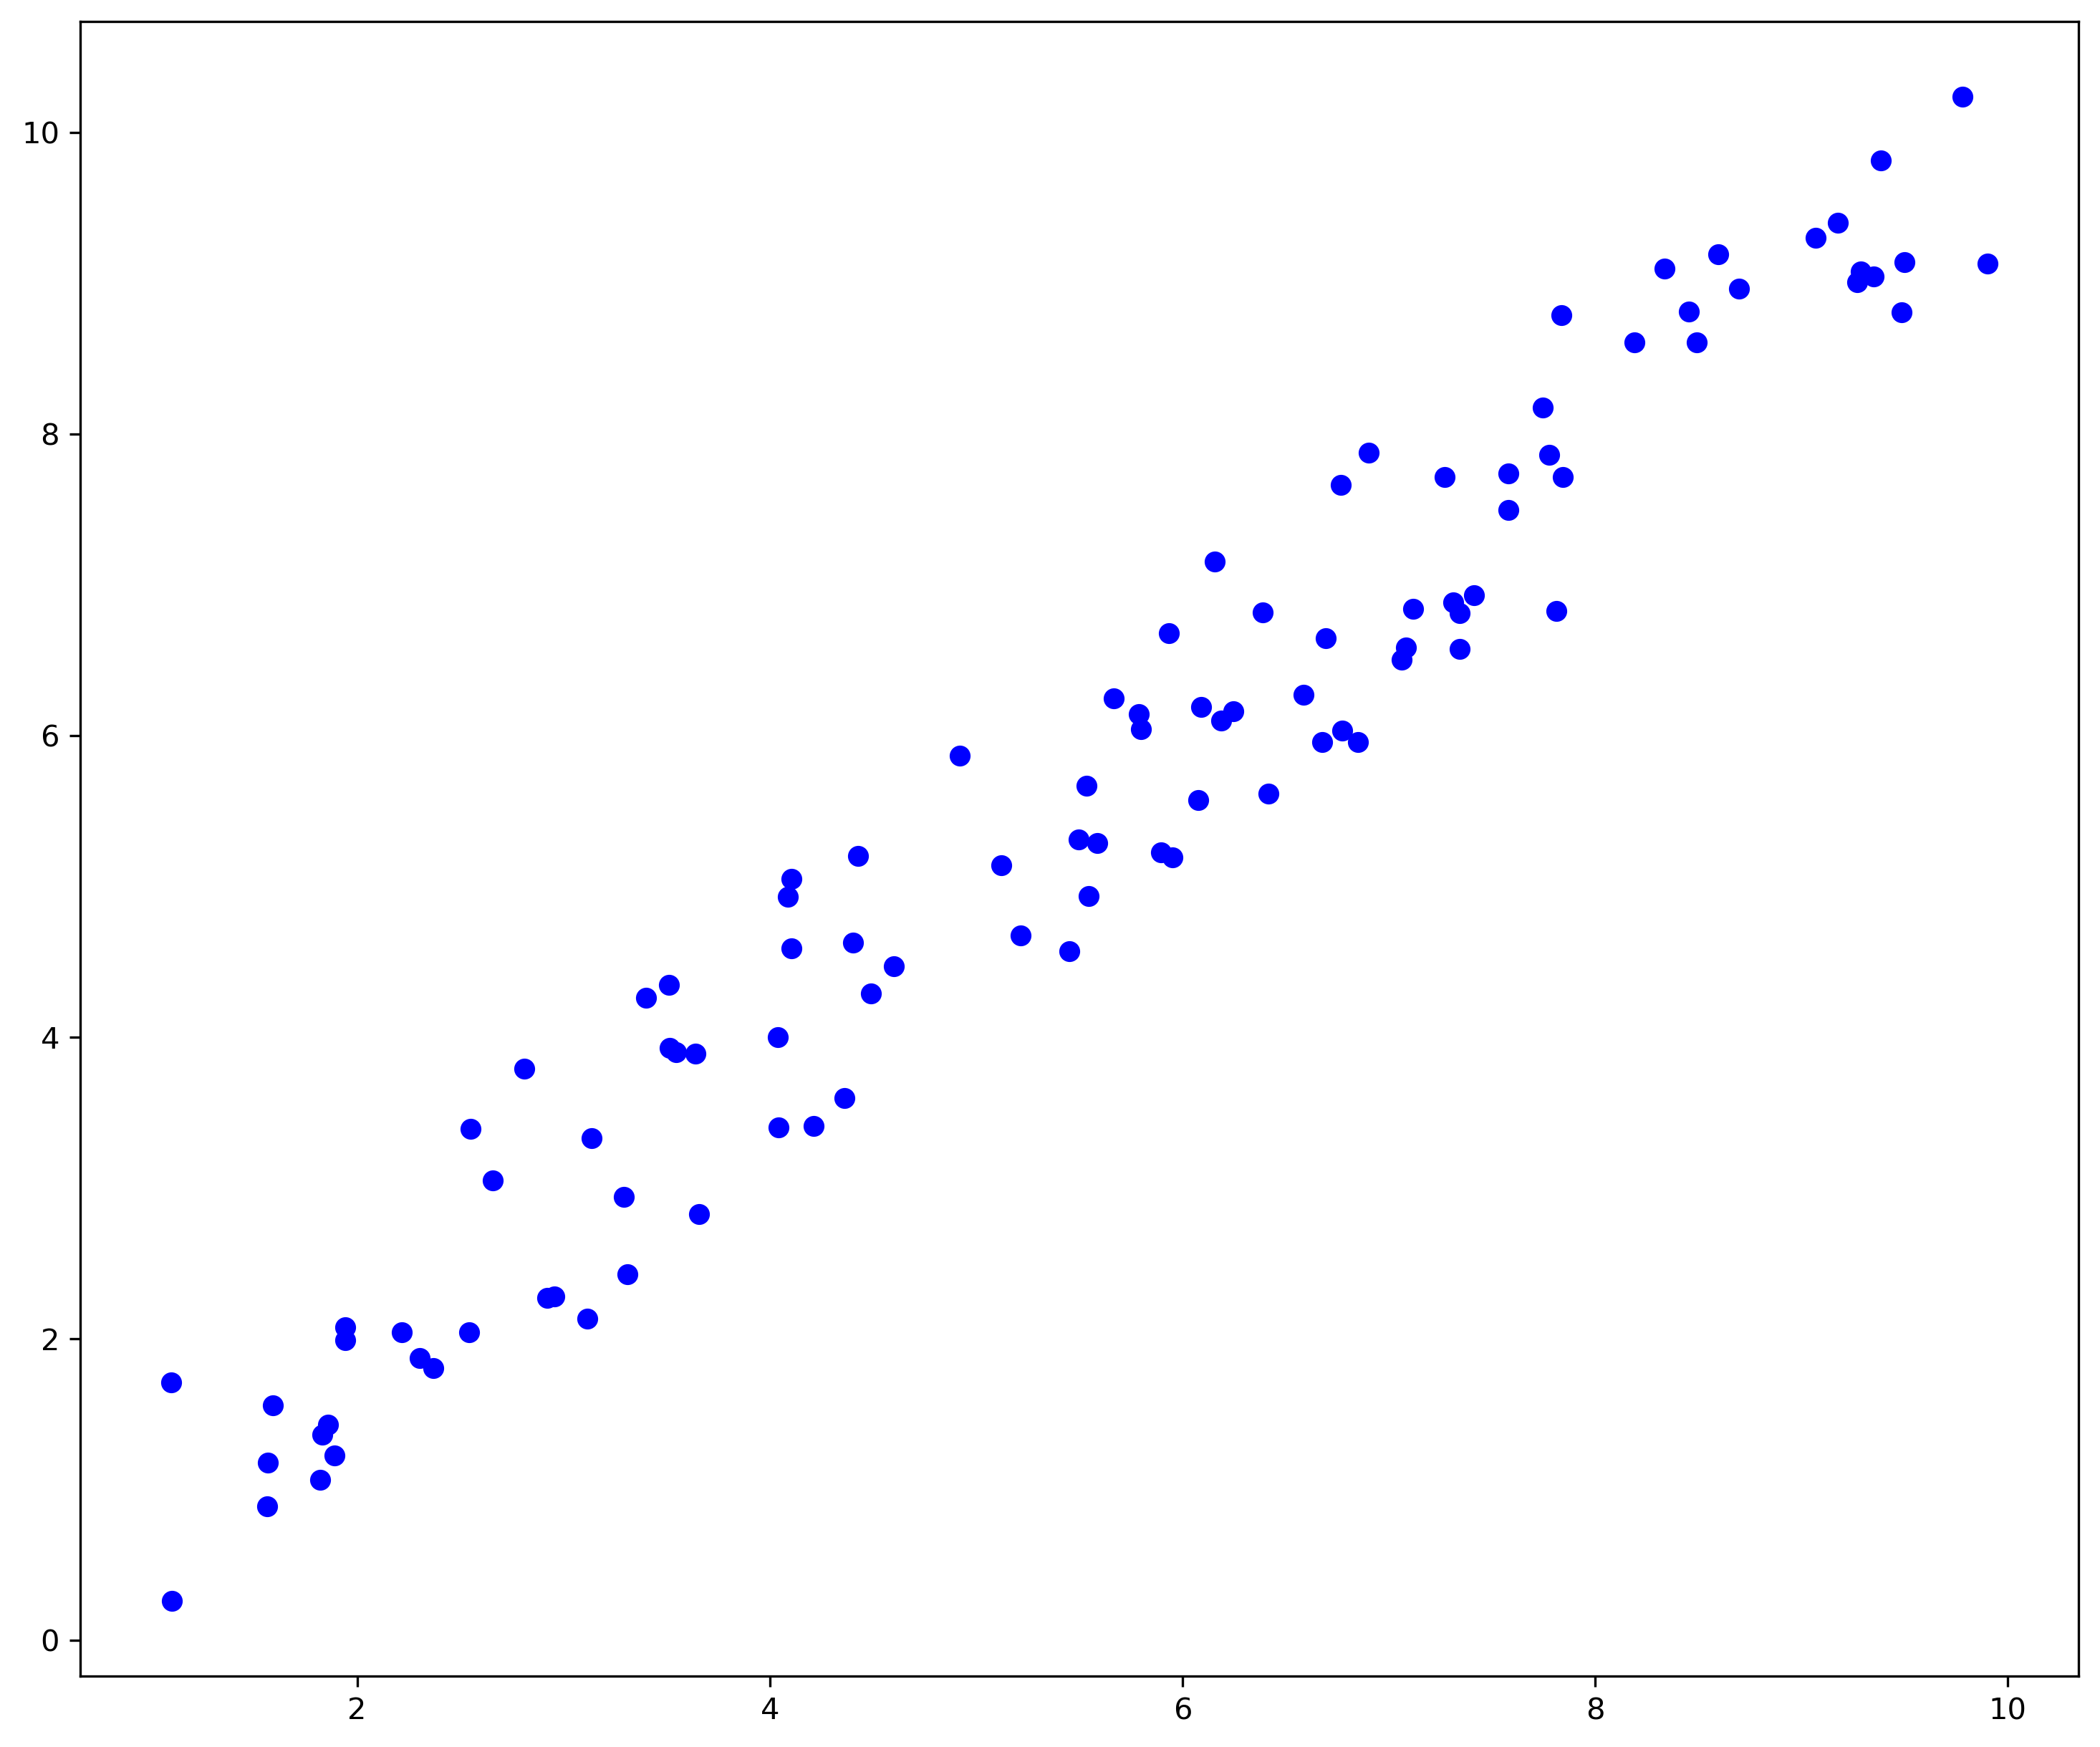

In [4]:
num_points = 100
m, b, delta = 1, 0, 1

# Генерируем точки x из равномерномерного распределения на отрезке [1, 10]
x = np.array([random.uniform(1, 10) for i in range(num_points)])
# Точки y также генерируется из равномерного распределения на отрезке [m * x_i + b - delta,
# m * x_i + b + delta] (модель шума в данных)
y = np.array([random.uniform(m * x + b - delta,
                             m * x + b + delta) for x in x])

fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, color='blue')
plt.show()

Обучим нашу линейную регрессию и посмотрим на результат

In [5]:
m, b, cost = linear_regression(x, y)

m = 0.0071, b = 0.0011, cost = 35.7250
m = 0.0142, b = 0.0022, cost = 35.2067
m = 0.0212, b = 0.0032, cost = 34.6960
m = 0.0282, b = 0.0043, cost = 34.1928
m = 0.0351, b = 0.0053, cost = 33.6969
m = 0.0420, b = 0.0064, cost = 33.2083
m = 0.0488, b = 0.0074, cost = 32.7269
m = 0.0556, b = 0.0084, cost = 32.2525
m = 0.0623, b = 0.0095, cost = 31.7850
m = 0.0690, b = 0.0105, cost = 31.3245
m = 0.0756, b = 0.0115, cost = 30.8706
m = 0.0822, b = 0.0125, cost = 30.4234
m = 0.0887, b = 0.0135, cost = 29.9828
m = 0.0952, b = 0.0145, cost = 29.5486
m = 0.1016, b = 0.0154, cost = 29.1207
m = 0.1080, b = 0.0164, cost = 28.6992
m = 0.1144, b = 0.0174, cost = 28.2838
m = 0.1206, b = 0.0183, cost = 27.8745
m = 0.1269, b = 0.0193, cost = 27.4712
m = 0.1331, b = 0.0202, cost = 27.0738
m = 0.1392, b = 0.0211, cost = 26.6822
m = 0.1453, b = 0.0221, cost = 26.2963
m = 0.1514, b = 0.0230, cost = 25.9162
m = 0.1574, b = 0.0239, cost = 25.5415
m = 0.1634, b = 0.0248, cost = 25.1724
m = 0.1693, b = 0.0257, c

Величина <code>cost</code> постепенно стремится к нулю $-$ линейная регрессия обучилась.

Построим график, на котором изобразим множество сгенерированных точек и регрессионную прямую, аппроксимирующую линейную зависимость для сгенерированных точек.

MSE: 0.3397343027856906


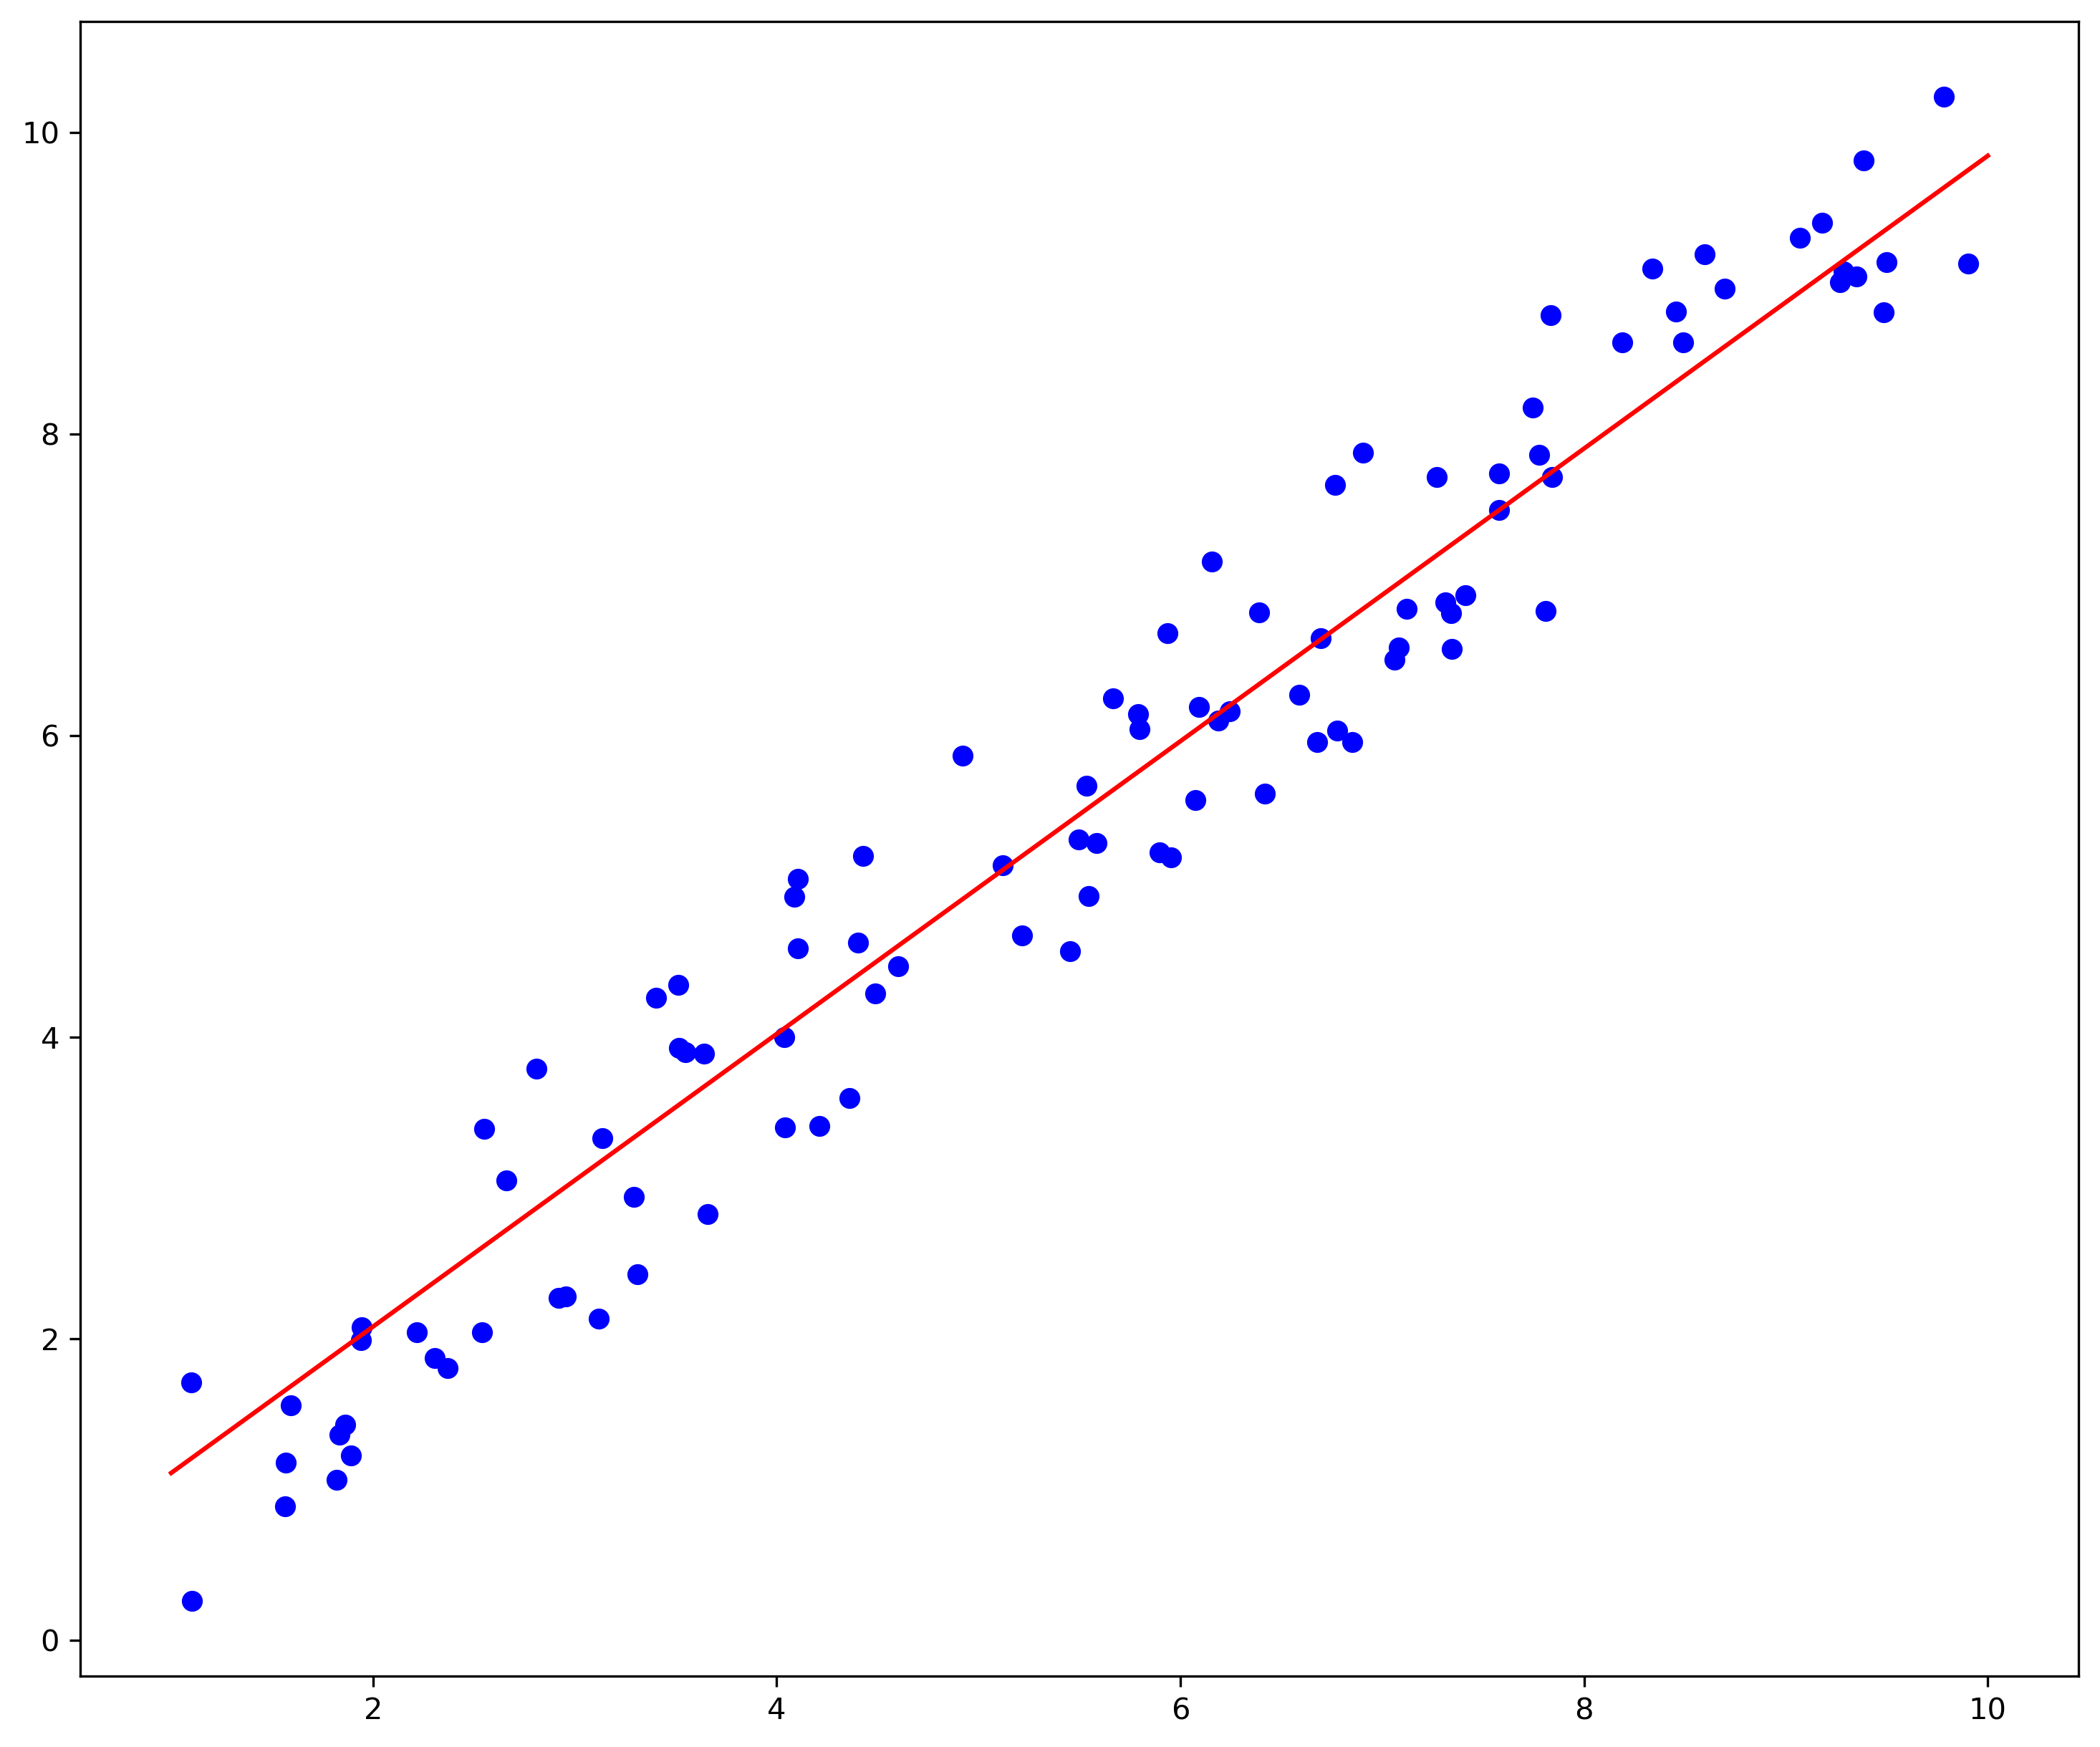

In [6]:
x_pr = np.arange(1.0, 10.1, 0.1)
y_pr = [m * elem + b for elem in x_pr] 

fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, color='blue')
ax.plot(x_pr, y_pr, color='red')

print(f"MSE: {cost}")

## Задание 1

Поэкспериментируйте с количеством шагов (<code>epochs</code>) и <code>learning_rate</code>.
Как меняется итоговая ошибка при фиксированном числе шагов и различных <code>learning_rate</code>?

1) Постройте графики для <code>learning_rate = [0.1, 0.01, 0.0001]</code> и <code>epochs = [10, 100, 1000]</code> (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (<code>cost</code>).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

**Решение:**

Представим получившиеся результаты на 9 графиках

/home/demidroll-s/anaconda3/envs/base_env/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_25658/2291591764.py:11: RuntimeWarning: overflow encountered in multiply
  cost = np.mean(delta * delta)
/tmp/ipykernel_25658/2291591764.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  m_current -= learning_rate * dQ_dm


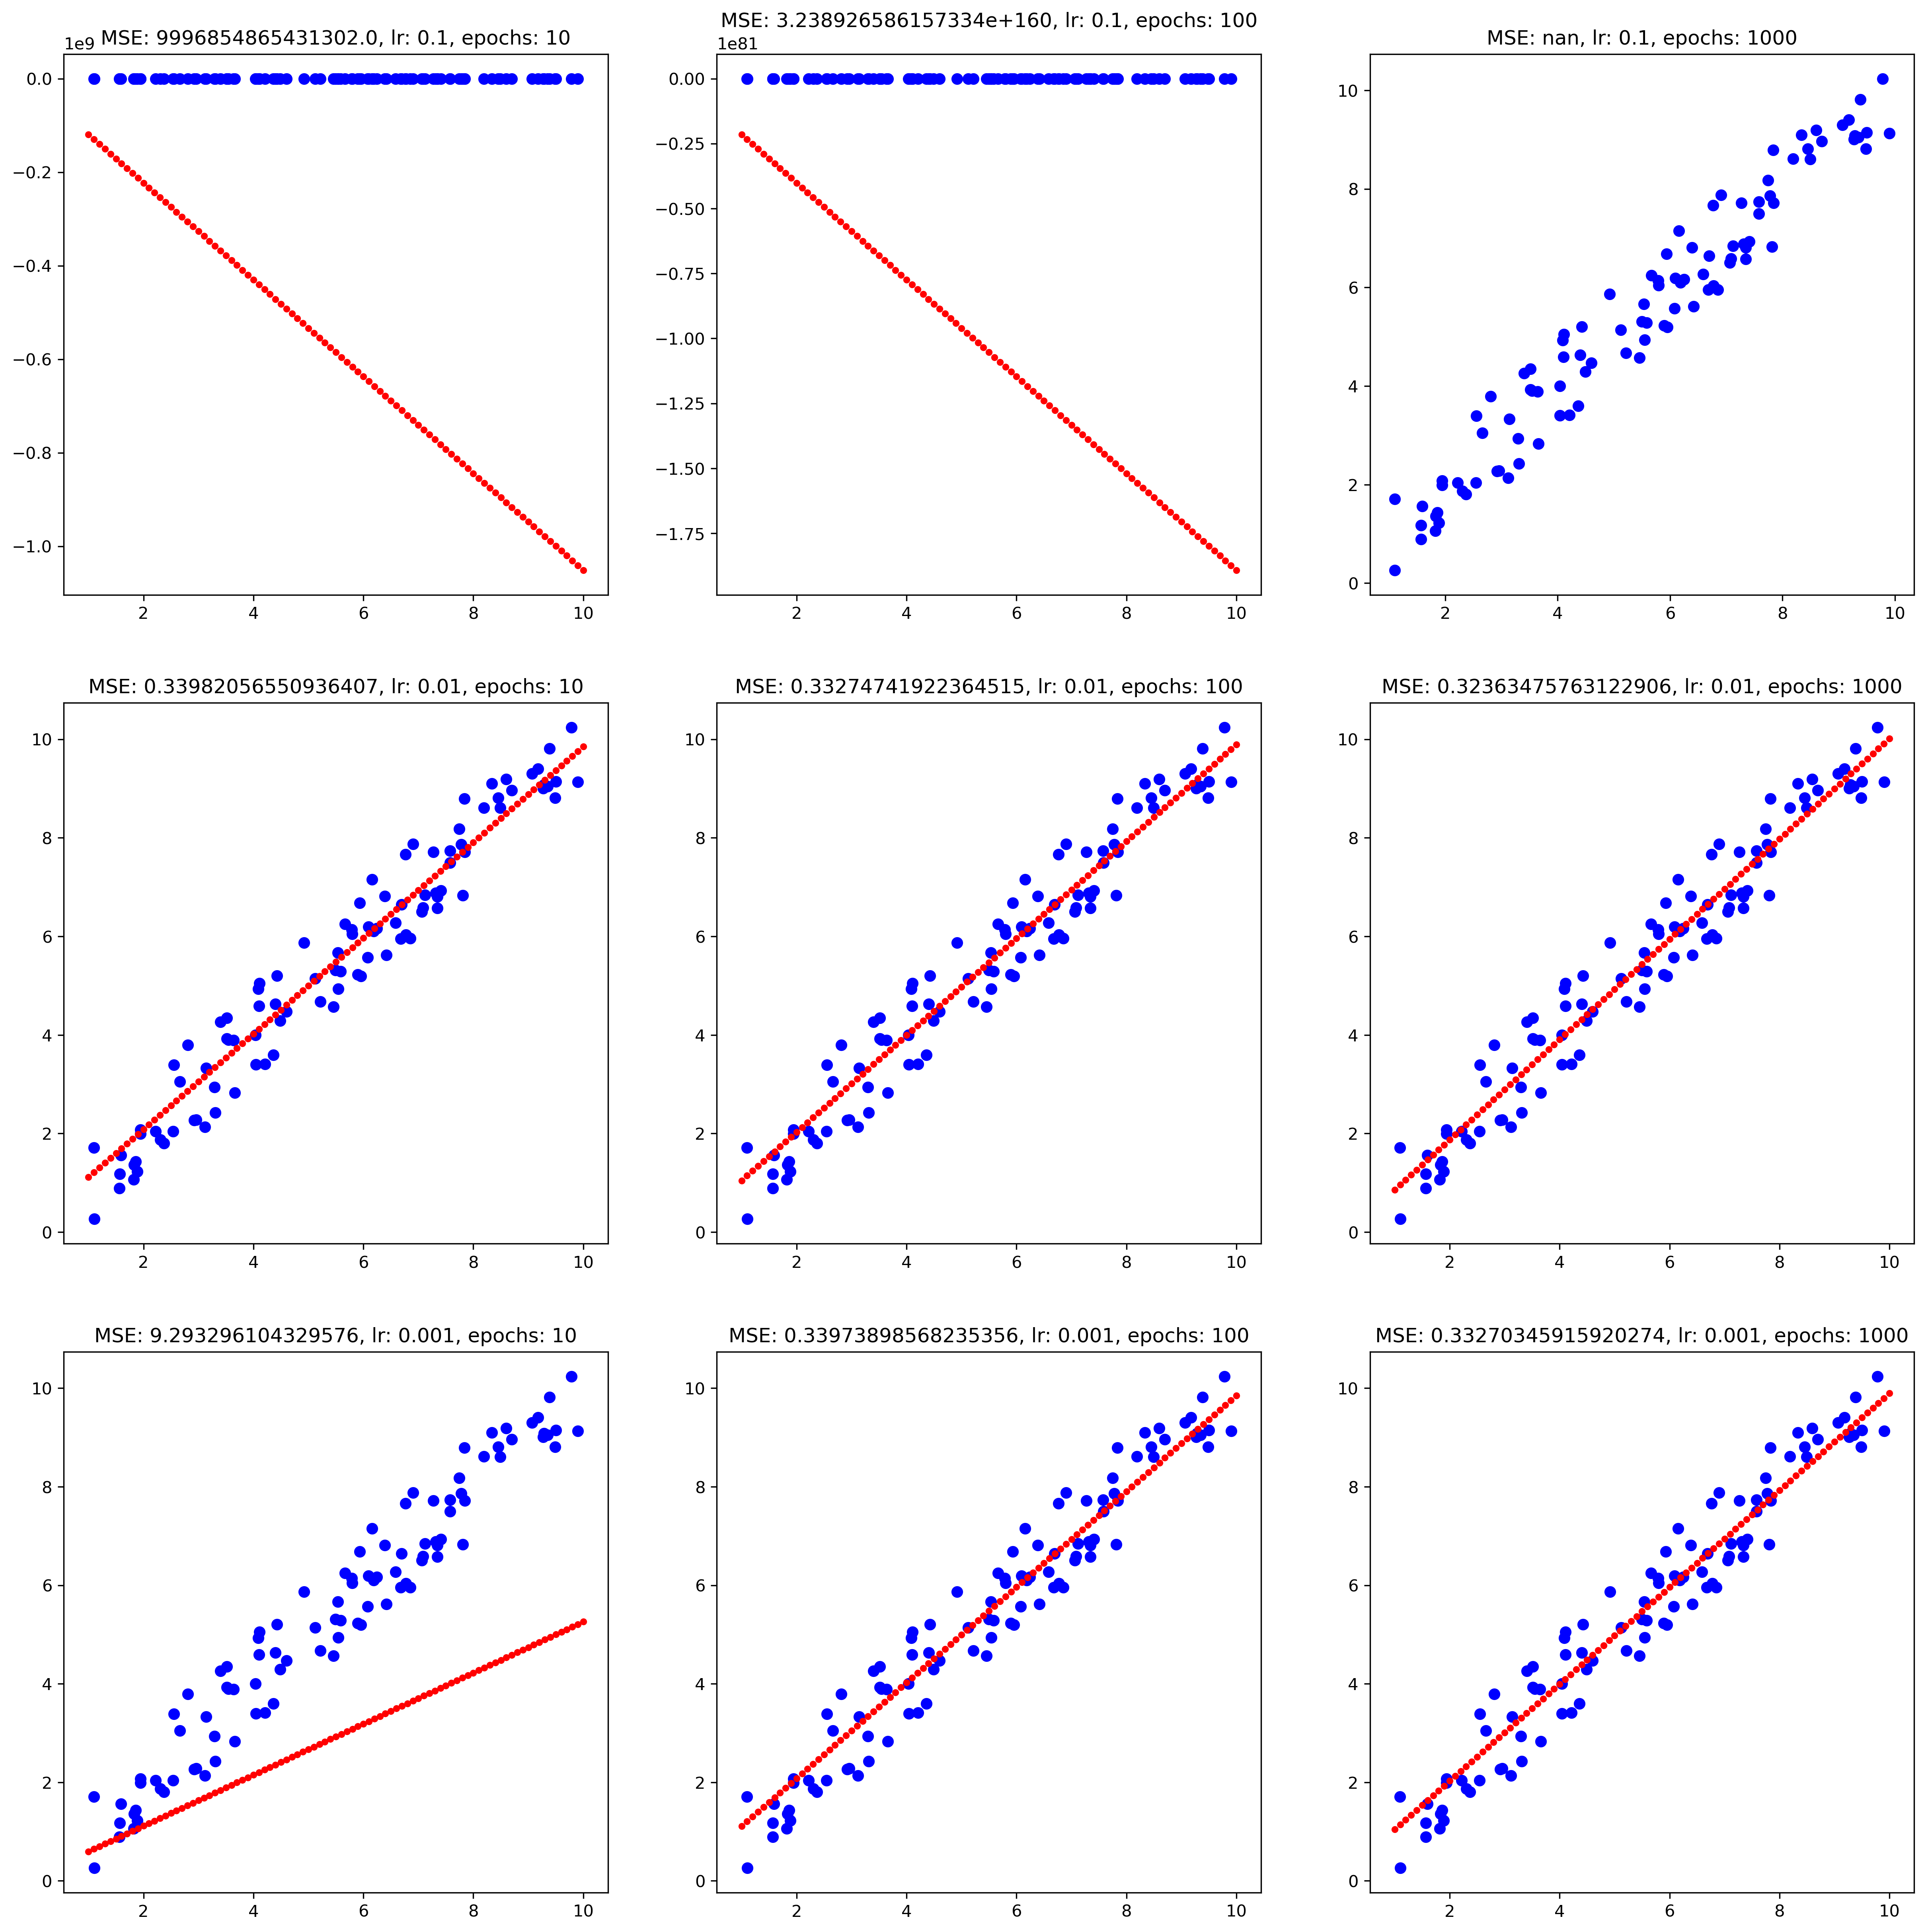

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i, learning_rate in enumerate([0.1, 0.01, 0.001]):
    for j, epochs in enumerate([10, 100, 1000]):
        m, b, cost = linear_regression(x,y,
            epochs=epochs,
            learning_rate=learning_rate,
            output=False
        )
        x_pr = np.arange(1.0, 10.1, 0.1)
        y_pr = [m * elem + b for elem in x_pr] 

        axes[i][j].scatter(x, y, color='blue')
        axes[i][j].scatter(x_pr, y_pr, color='red',s=10)
        axes[i][j].set_title(f"MSE: {cost}, lr: {learning_rate}, epochs: {epochs}")

Как видно, линейная регрессия обучилась только в 5 из 9 случаях. В трех "удачных" кейсах величина <code>learning_rate = 0.01</code>, число итераций при этом было произвольным. Для <code>learning_rate = 0.001</code> модель обучилась при <code>epochs = 100</code> и <code>epochs = 1000</code>. При той же величине <code>learning_rate</code> и выборе числа итераций <code>epochs = 10</code> модель оказалась недообученной.

## Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

**Решение:**

Набор сгенерированных точек аппроксимируется квадратичной зависимостью

$$f(x, m, b) = m x^2 + b.$$

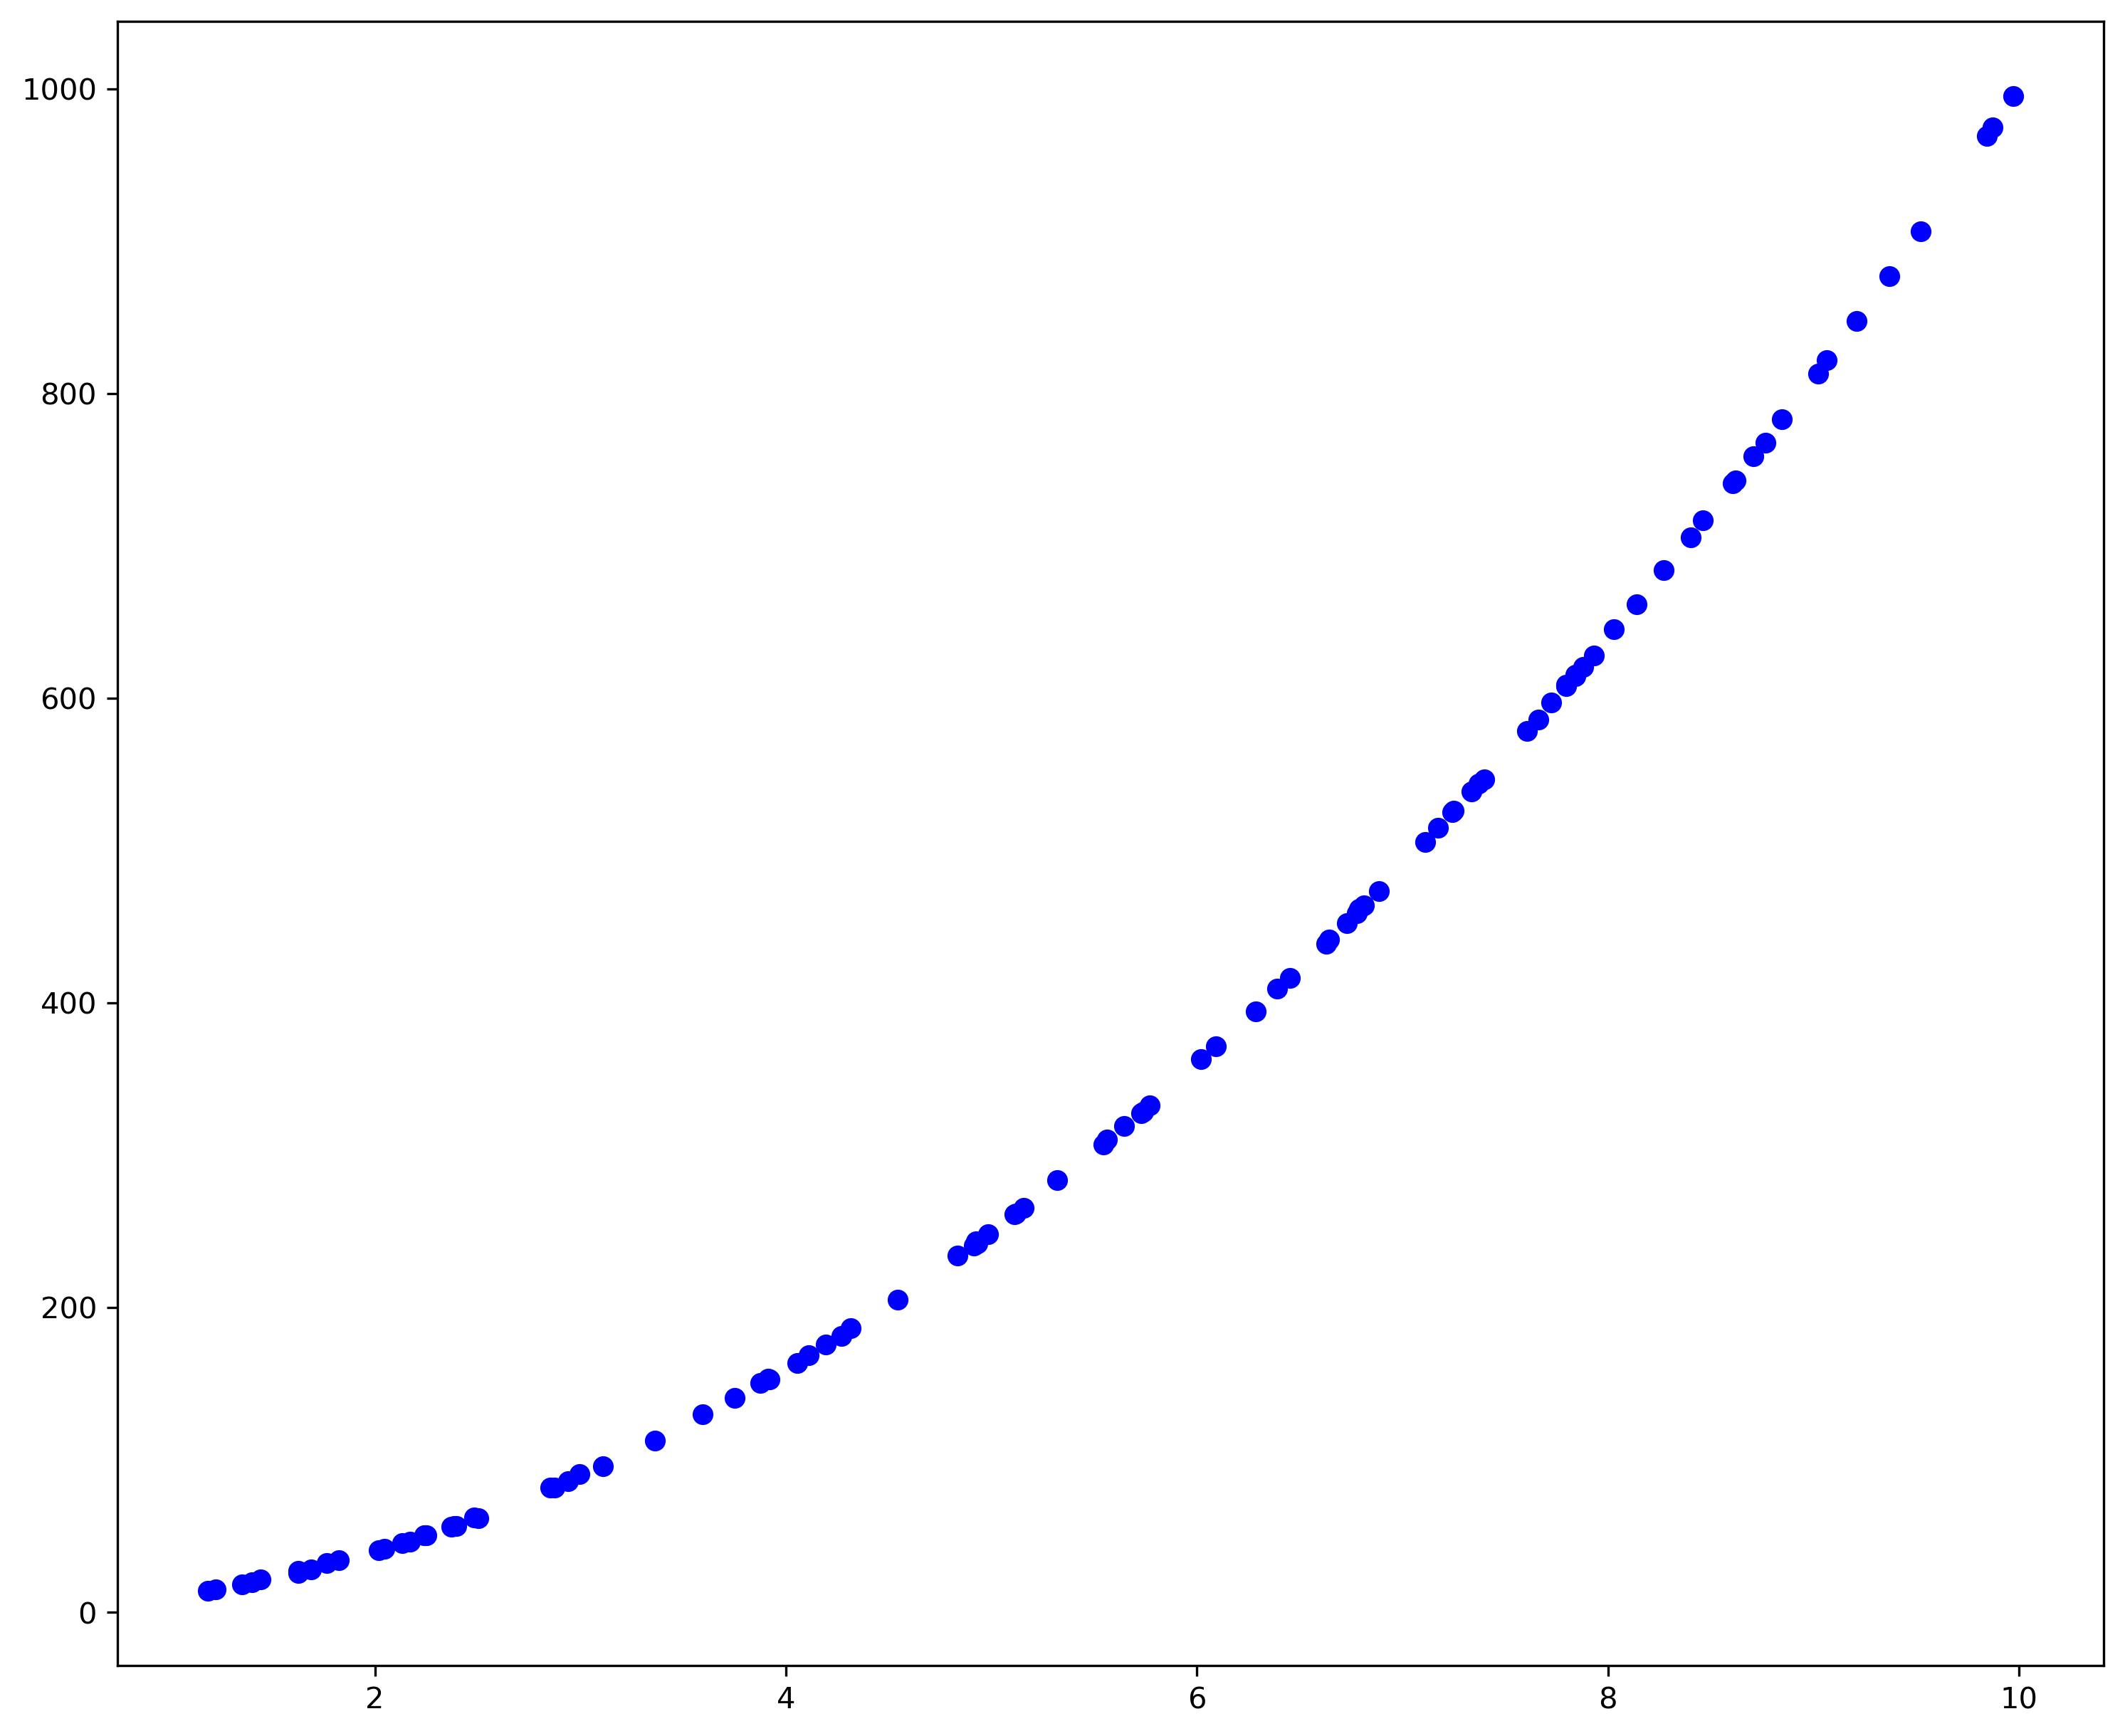

In [8]:
num_points = 100
m, b, delta = 10, 0, 1

x = np.array([random.uniform(1, 10) for i in range(num_points)])
y = np.array([random.uniform(m * x * x + b - delta,
                             m * x * x + b + delta) for x in x])

fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, color='blue')
plt.show()

Вместо $x$ в качестве признака будем использовать $x^2$. 

In [9]:
m, b, cost = linear_regression(x * x, y, output=False)

MSE: 0.34564903347592113


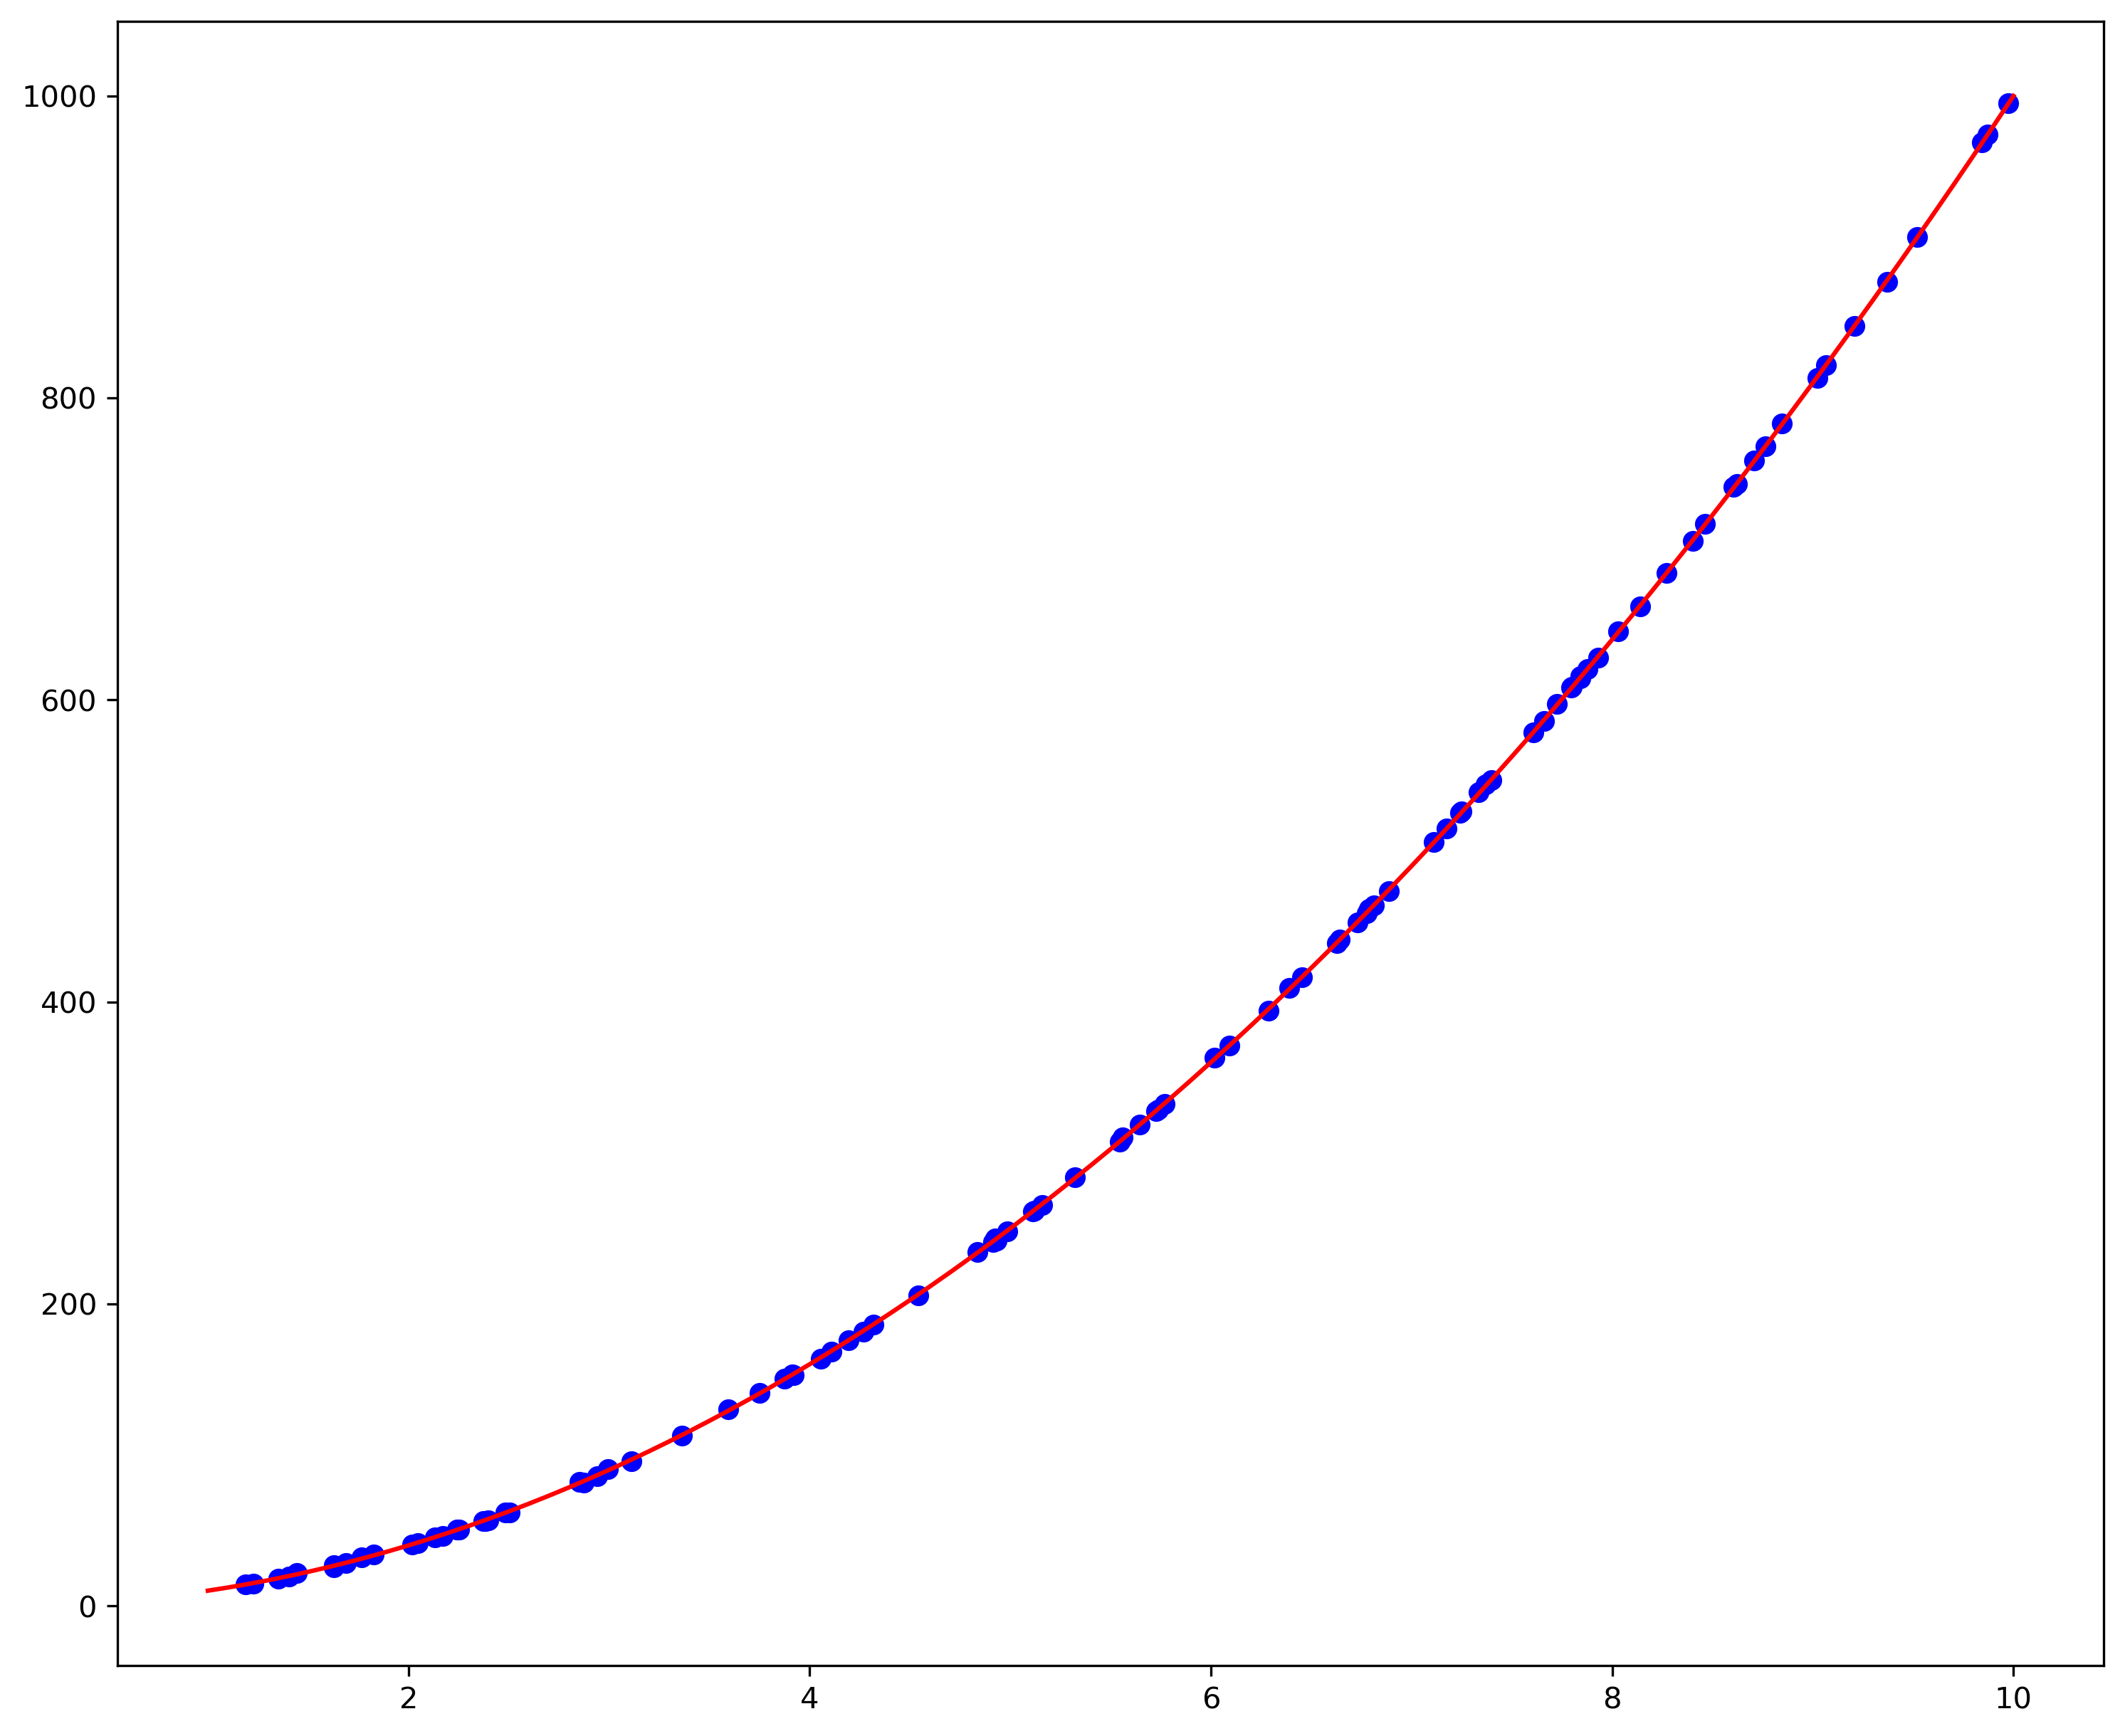

In [10]:
x_pr = np.arange(1.0, 10.1, 0.1)
y_pr = [m * elem * elem + b for elem in x_pr] 

fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, color='blue')
ax.plot(x_pr, y_pr, color='red')

print('MSE: {}'.format(cost))

Квадратичная зависимость хорошо аппроксимирует сгенерированные точки. При этом мы по-прежнему использовали линейную регрессию.

## Задание 3

Считайте файл <code>weights_heights.csv</code>

In [11]:
df = pd.read_csv('weights_heights.csv')
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


1. Разбейте данные на обучающую и тестовую части, обучите линейную регрессию на тренировочной части (используйте функцию <code><font color=blue>linear_regression</font></code> для обучения).

2. Сделайте предсказание на обучающей и тестовой частях по формуле $y = m x + b$.

3. Вычислите метрику качества обучения MSE на train и test выборках.

**Решение:**

Произведем разбиение датасета на обучающую (train) и тестовую (test) выборки. Обучим линейную регрессию на обучающей выборке.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'],
                                                    test_size=0.2,
                                                    random_state=42)

m, b, cost = linear_regression(X_train, y_train,
                               learning_rate=0.0002,
                               output=False)

Вычислим MSE метрику

In [13]:
from sklearn.metrics import mean_squared_error

prediction_train = X_train * m + b
prediction_test = X_test * m + b

print(f"MSE on train: {mean_squared_error(y_train, prediction_train):.4f}")
print(f"MSE on test: {mean_squared_error(y_test, prediction_test):.4f}:")

MSE on train: 106.5620
MSE on test: 108.3437:


Рассмотрим другую метрику качества обучения $R^2$ (коэффициент детерминации).

In [14]:
from sklearn.metrics import r2_score

In [15]:
print(f"R^2 on train: {r2_score(y_train, prediction_train):.6f}")
print(f"R^2 on test: {r2_score(y_test, prediction_test):.6f}")

R^2 on train: 0.212471
R^2 on test: 0.218344


Коэффициент детерминации получился слишком низкий. Посмотрим, что из себя представляют данные, визуализировав точки $(x_i, y_i)$ на плоскости.

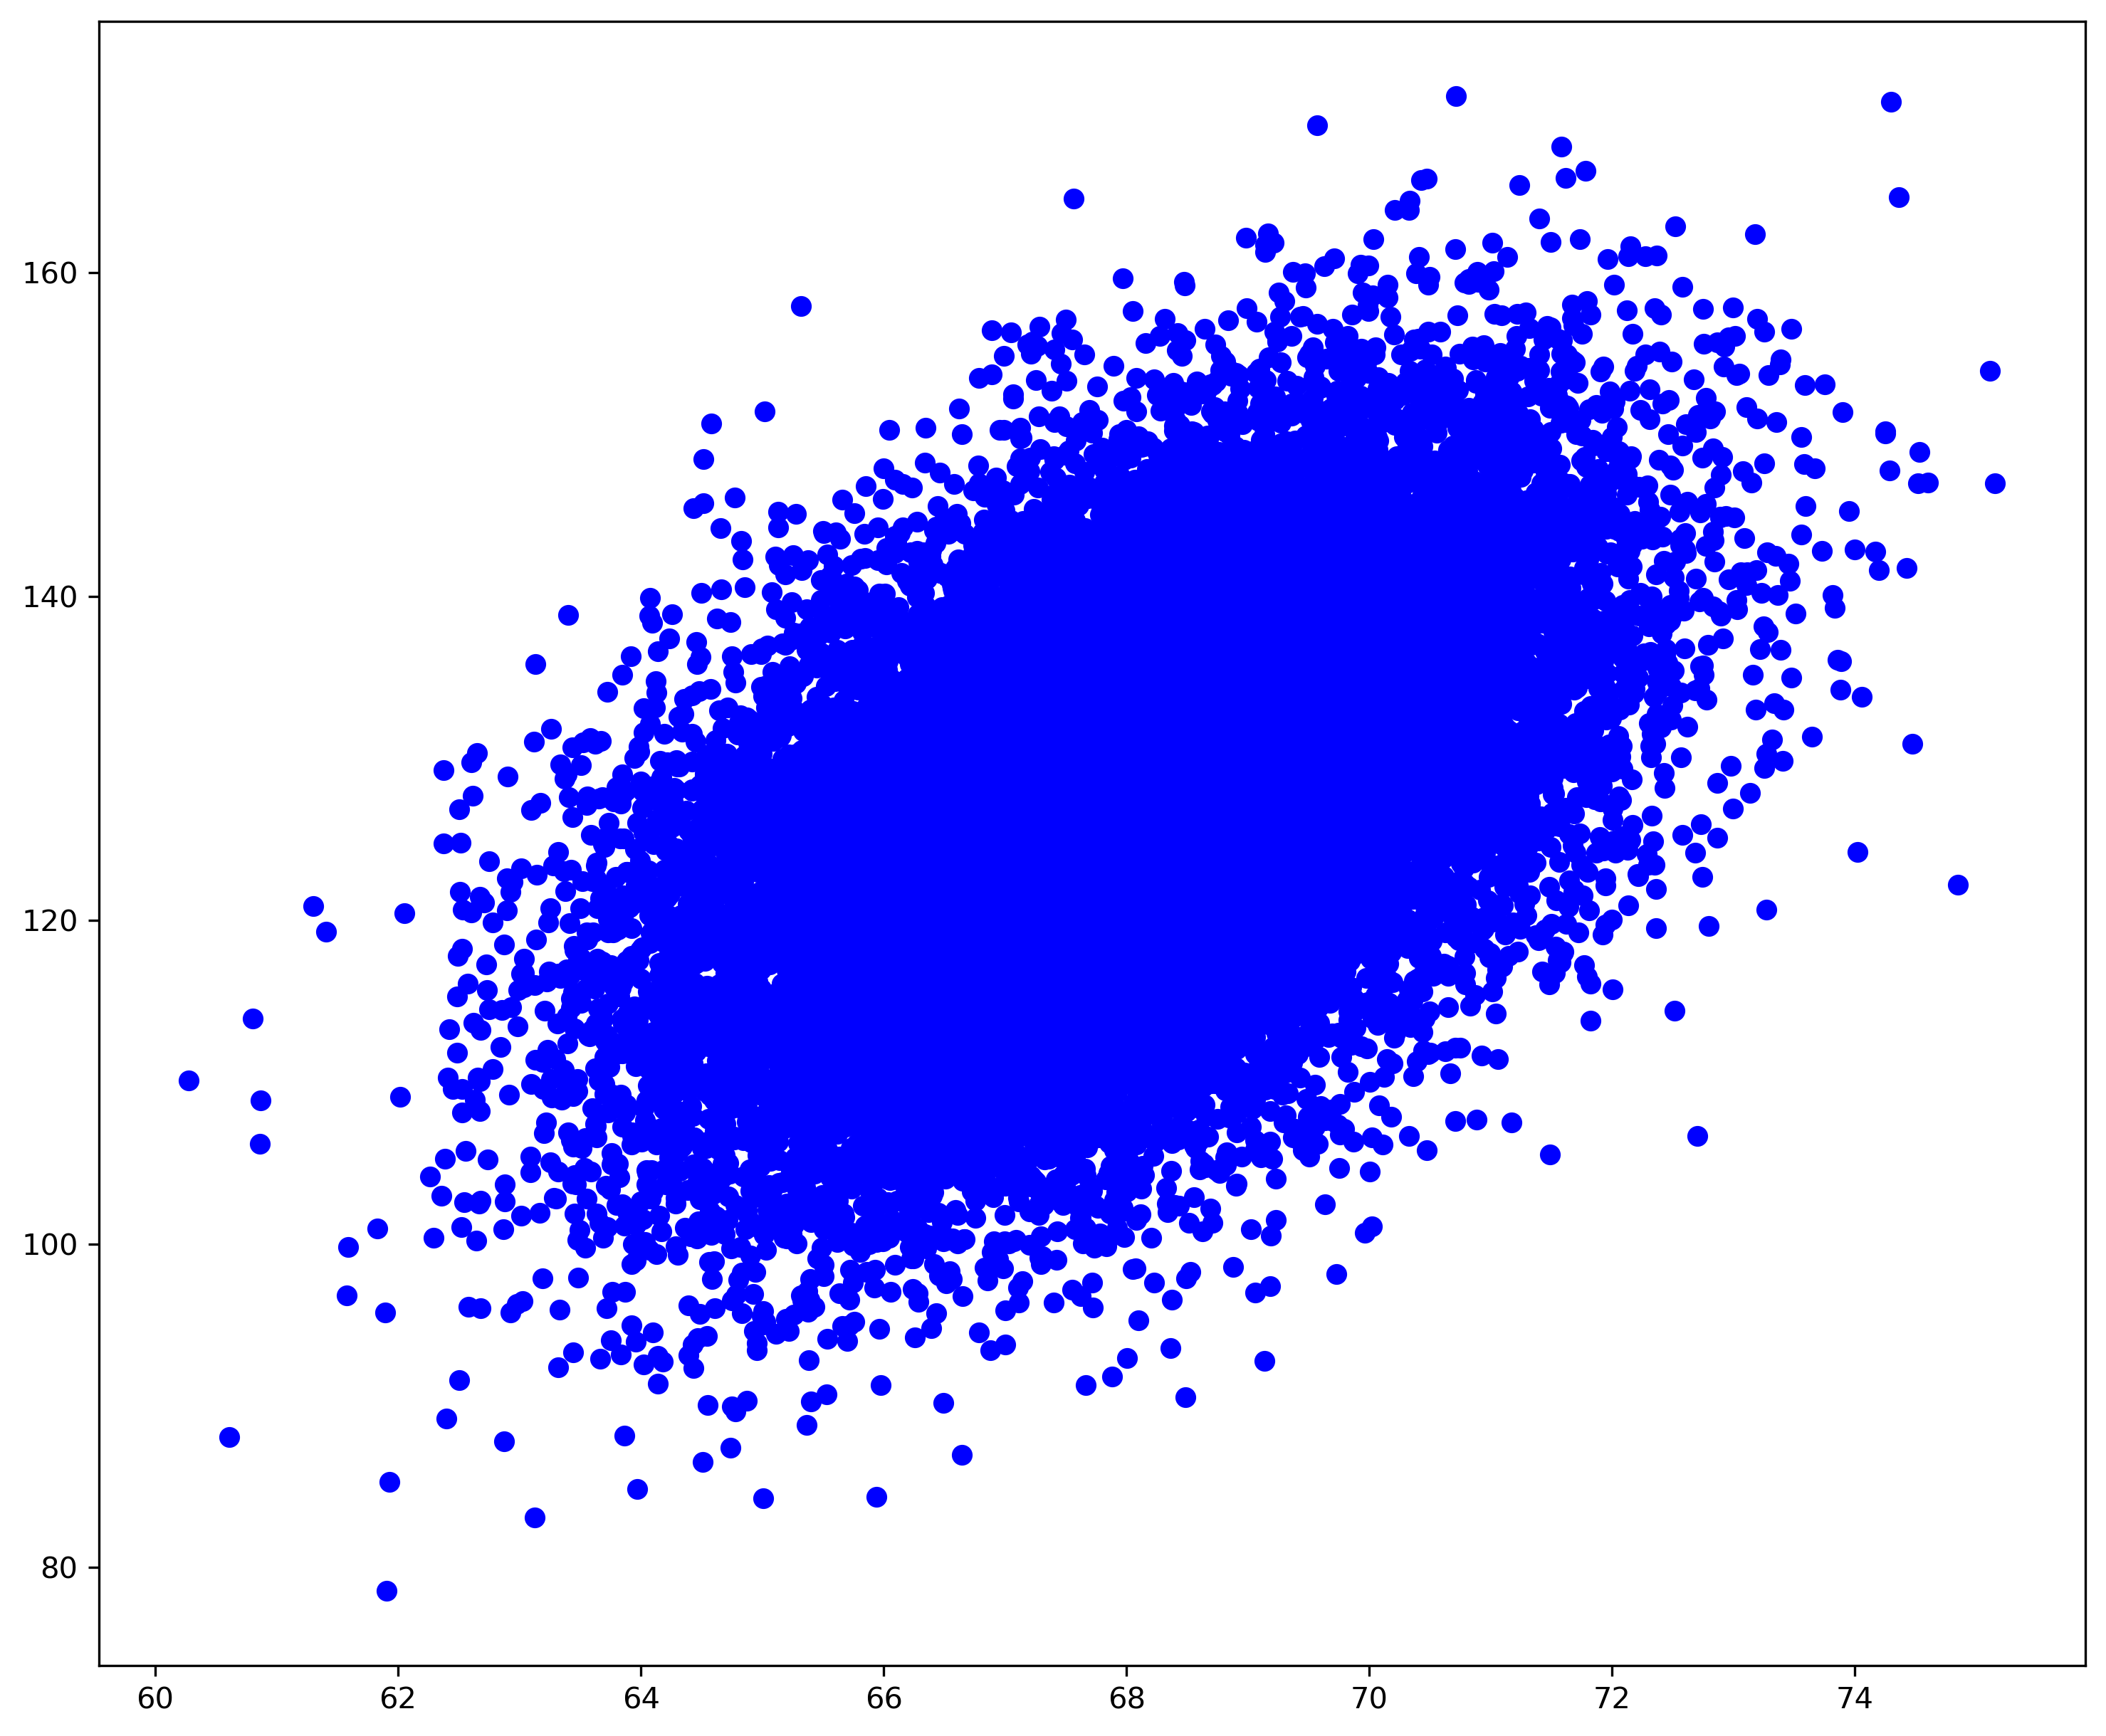

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(X_train, y_train, color='blue')
plt.show()

Облако точек не удастся аппроксимировать линейной зависимостью.

Теперь проверим, как работает функция линейной регрессии из <code>sklearn.<font color='steelblue'>linear_model</font></code>.

In [17]:
from sklearn.linear_model import LinearRegression

X_train2 = X_train.values.reshape(-1, 1)
X_test2 = X_test.values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_train2, y_train)

pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)

print(f"MSE on train: {mean_squared_error(y_train, pred_train):.4f}")
print(f"MSE on test: {mean_squared_error(y_test, pred_test):.4f}:")

MSE on train: 101.3644
MSE on test: 102.4879:


Посмотрим на качество линейной регрессии на кросс-валидации.

In [18]:
from sklearn.model_selection import cross_val_score

print('Cross-validation MSE score', -cross_val_score(lr, df[['Height']], df['Weight'],
    cv=5, scoring='neg_mean_squared_error').mean())
print('Cross-validation R^2 score', cross_val_score(lr, df[['Height']], df['Weight'],
    cv=5, scoring='r2').mean())

Cross-validation MSE score 101.6076895569981
Cross-validation R^2 score 0.2527377106040215


По качеству обучения получились похожие результаты.

## Задание 4

Поработаем с датасетом **Boston**.

**Решение:**

Поскольку датасет удален из последних версий <code>sklearn</code>, то будем работать с <code>.csv</code> файлом. 

In [19]:
housing = pd.read_csv('Boston.csv')
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Удалим ненужный столбец

In [20]:
housing.drop(['Unnamed: 0'], axis=1, inplace=True)

Получим информацию о датасете

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Все признаки являются числовыми.

Извлечем матрицу признаков и вектор целевой переменной

In [22]:
X_full = housing.drop(['medv'], axis=1)
y_full = housing['medv']

Разобьем данные на обучающую (train) и валидационную (test) выборки. Обучим линейную регрессию на train выборке и сделаем предсказание на train и test выборках. Выведем MSE и коэффициент детерминации для train и test выборок.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(f'MSE on train: {mean_squared_error(pred_train, y_train) :.6f}')
print(f'MSE on test: {mean_squared_error(pred_test, y_test) :.6f}')
print(f'R^2 score on train: {r2_score(pred_train, y_train) :.6f}')
print(f'R^2 score on test: {r2_score(pred_test, y_test) :.6f}')

MSE on train: 21.641413
MSE on test: 24.291119
R^2 score on train: 0.668239
R^2 score on test: 0.633325


Построим корреляционную матрицу признаков

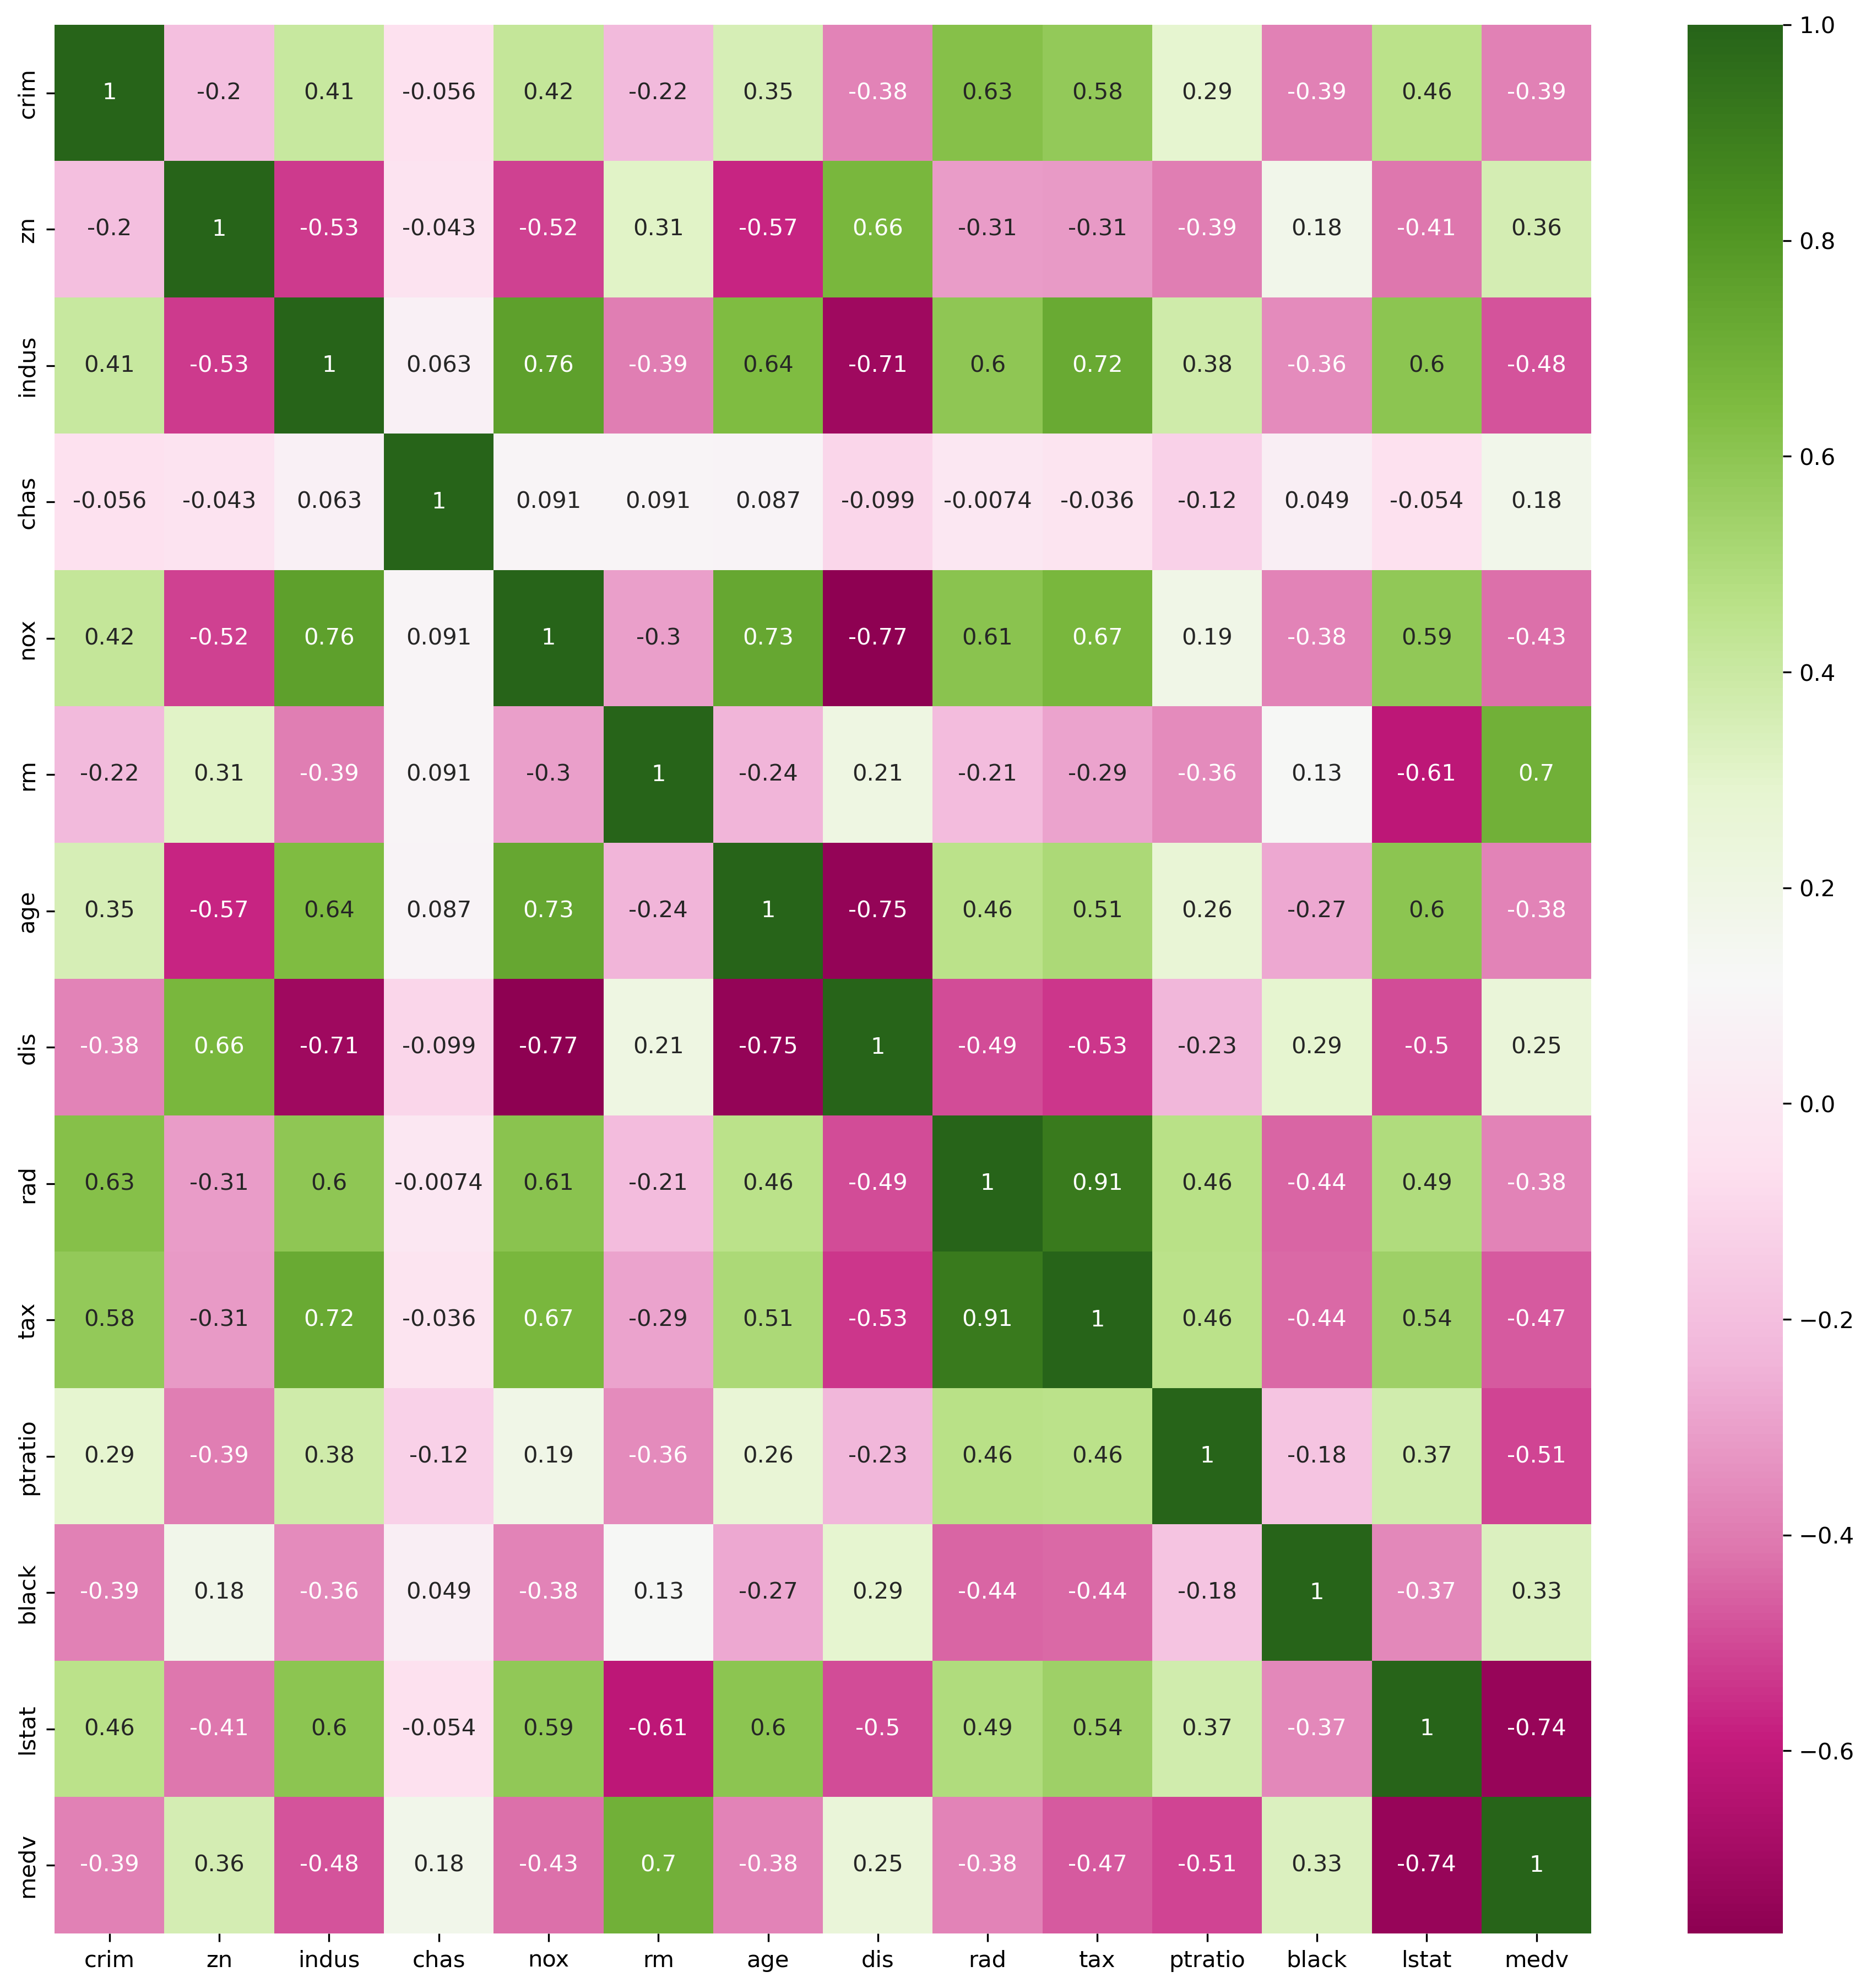

In [25]:
import seaborn as sns

data = pd.DataFrame(data=np.c_[X_full, y_full],
                     columns=list(housing.columns))
corr = data.corr()
                    
figure = plt.figure(figsize=(15, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='PiYG', annot=True)
plt.show()

Выведем значения коэффициента корреляции между признаком **lstat** и целевой переменной **medv**

In [26]:
np.corrcoef(data['lstat'], data['medv'])[0][1]

-0.7376627261740148

Попробуем убрать признаки, имеющие наименьшую корреляциию с target, и обучить линейную регрессию на оставшихся признакаx. Удалим признак **chas** из матрицы признаков.

In [27]:
X_full = housing.drop(['chas', 'medv'], axis='columns')
y_full = housing['medv']

Осуществим масштабирование данных, используя <code>MinMaxScaler</code> из <code>sklearn.<font color='steelblue'>preprocessing</font></code>

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(f'MSE on train: {mean_squared_error(pred_train, y_train) :.6f}')
print(f'MSE on test: {mean_squared_error(pred_test, y_test) :.6f}')
print(f'R^2 score on train: {r2_score(pred_train, y_train) :.6f}')
print(f'R^2 score on test: {r2_score(pred_test, y_test) :.6f}')

MSE on train: 22.112460
MSE on test: 24.635394
R^2 score on train: 0.658553
R^2 score on test: 0.632309


Удалось чуть улучшить величину MSE, но при этом коэффициент детерминации чуть уменьшился.

Построим гистограмму распределения для признака **dis**

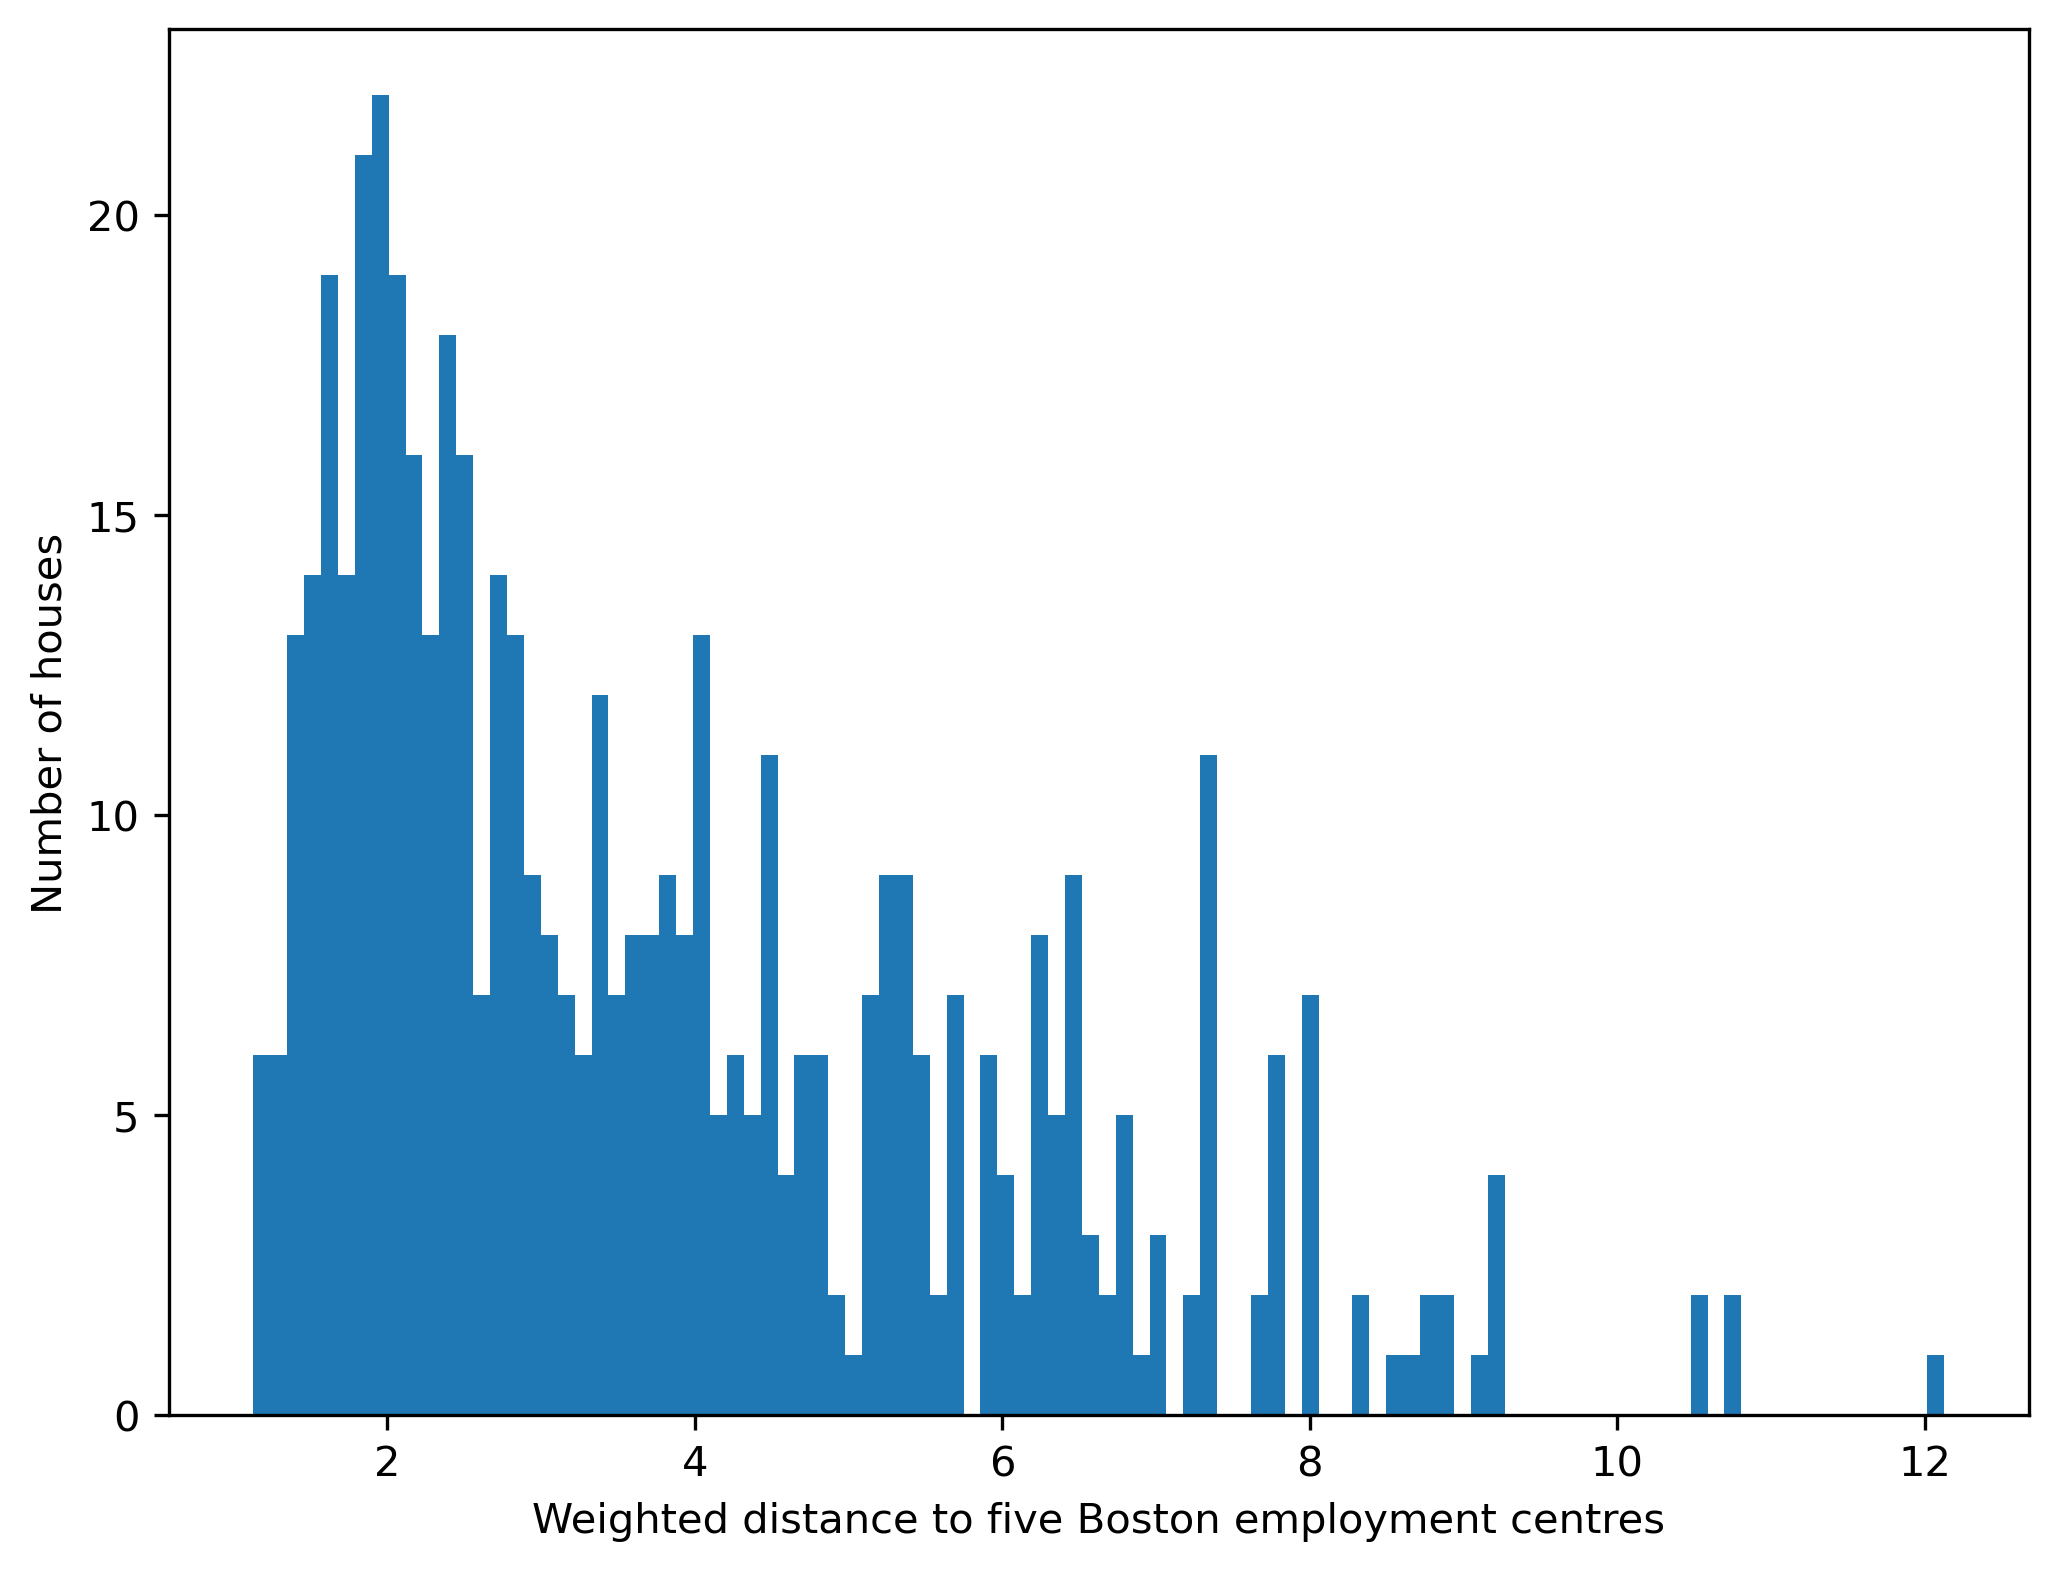

In [31]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
ax.set_xlabel('Weighted distance to five Boston employment centres')
ax.set_ylabel('Number of houses')
plt.hist(housing['dis'], bins=100)
plt.show()

Выведем коэффициенты линейной регрессии для всех признаков, кроме удаленного **chas**

In [32]:
for coef, column in zip(
    lr.coef_.round(2),
    data.drop(['chas', 'medv'], axis='columns').columns
):
    print(column, coef)

crim -10.6
zn 3.2
indus 1.64
nox -7.87
rm 22.12
age -0.5
dis -16.09
rad 6.57
tax -6.25
ptratio -8.88
black 5.13
lstat -19.02


## Задание 1 (домашнее)

Визуализируйте процесс обучения линейной регрессии, а именно любым способом сделайте анимацию процесса обучения, т.е. выводите регрессионную линию через 10, 20, 30 и т.д. шагов градиентного спуска. Если получится сделать анимацию $-$ хорошо. Но можно просто вывести несколько графиков подряд.

**Решение:**

In [33]:
import moviepy.editor as mpy
import glob

In [34]:
def plot_linear_regression_gif(X, y,
                           m_current=0, b_current=0,
                           epochs=1000, learning_rate=0.0001):
    x_min = min(X)
    x_max = max(X)
    d = (x_max - x_min) / 100
    x_pr = np.arange(x_min, x_max + d, d)
    N = float(len(y))
    for i in range(epochs):
        delta = X * m_current + b_current - y
        dQ_db = 2 * np.mean(delta)
        dQ_dm = 2 * np.mean(X * delta)
        m_current -= learning_rate * dQ_dm
        b_current -= learning_rate * dQ_db
        cost = np.mean(delta * delta)
        if (i % 20 == 0):
            fig, ax = plt.subplots(figsize=(12, 10))
            y_pr = [m_current * elem + b_current for elem in x_pr]
            ax.scatter(X, y, color='blue')
            ax.plot(x_pr, y_pr, color='red')
            image_path = "pngs/" + "%04d" % (i,) + ".png"
            plt.savefig(image_path)
            plt.close()

In [35]:
!mkdir pngs

In [36]:
num_points = 1000
m, b, delta = 1, 0, 1

X_data = np.array([random.uniform(1, 10) for i in range(num_points)])
y_data = np.array([random.uniform(m * x + b - delta,
                             m * x + b + delta) for x in X_data])

In [37]:
#plot_linear_regression_gif(X_data, y_data)

In [38]:
#gif_name = 'Dynamics'
#fps = 6
#file_list = sorted(glob.glob('pngs/*.png'))
#clip = mpy.ImageSequenceClip(file_list, fps=fps)
#clip.write_gif('{}.gif'.format(gif_name), fps=fps)

Визуализируем процесс обучения, используя <code>IPyWidgets</code>.

In [39]:
def plot_linear_regression_widget(
                           epochs=1000, ax=None):
    X = X_data
    y = y_data
    m_current = 0
    b_current = 0
    learning_rate = 0.0001
    x_min = min(X)
    x_max = max(X)
    d = (x_max - x_min) / 100
    x_pr = np.arange(x_min, x_max + d, d)
    N = float(len(y))
    for i in range(epochs):
        delta = X * m_current + b_current - y
        dQ_db = 2 * np.mean(delta)
        dQ_dm = 2 * np.mean(X * delta)
        m_current -= learning_rate * dQ_dm
        b_current -= learning_rate * dQ_db
        cost = np.mean(delta * delta)
    fig, ax = plt.subplots(figsize=(12, 10))
    y_pr = [m_current * elem + b_current for elem in x_pr]
    ax.scatter(X, y, color='blue')
    ax.plot(x_pr, y_pr, color='red')

In [40]:
from ipywidgets import interact, fixed
interact(plot_linear_regression_widget, epochs=[10, 50, 100, 200, 1000], ax=fixed(None));

interactive(children=(Dropdown(description='epochs', index=4, options=(10, 50, 100, 200, 1000), value=1000), O…

## Задание 2 (домашнее)

Поработайте с датасетом из файла <code>affairs.csv</code>. Предскажите значение в колонке **affairs** по остальным факторам.

1. Сначала проведите анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

**Решение:**

Выгрузим данные из файла <code>affairs.csv</code>

In [41]:
df = pd.read_csv('affairs.csv')
df.head()

,rownames,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


Получим размер датасета

In [42]:
df.shape

(601, 10)

Получим информацию о датасете

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


Удалим столбец **rownames**, который не несет никакой полезной информации

In [44]:
df = df.drop(['rownames'], axis=1)

Также перемешаем строки нашего датасета

In [45]:
df = df.sample(frac=1)

In [46]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
486,7,female,37.0,10.0,no,1,20,5,3
248,0,female,52.0,15.0,yes,3,16,5,4
138,0,male,27.0,4.0,yes,4,20,5,5
432,0,male,27.0,4.0,yes,4,17,4,4
437,0,female,42.0,15.0,yes,4,14,5,4


В датасете 2 признака (**gender** и **children**) являются категориальными, а остальные $-$ целочисленными.

Посмотрим на распределение признака **affairs**

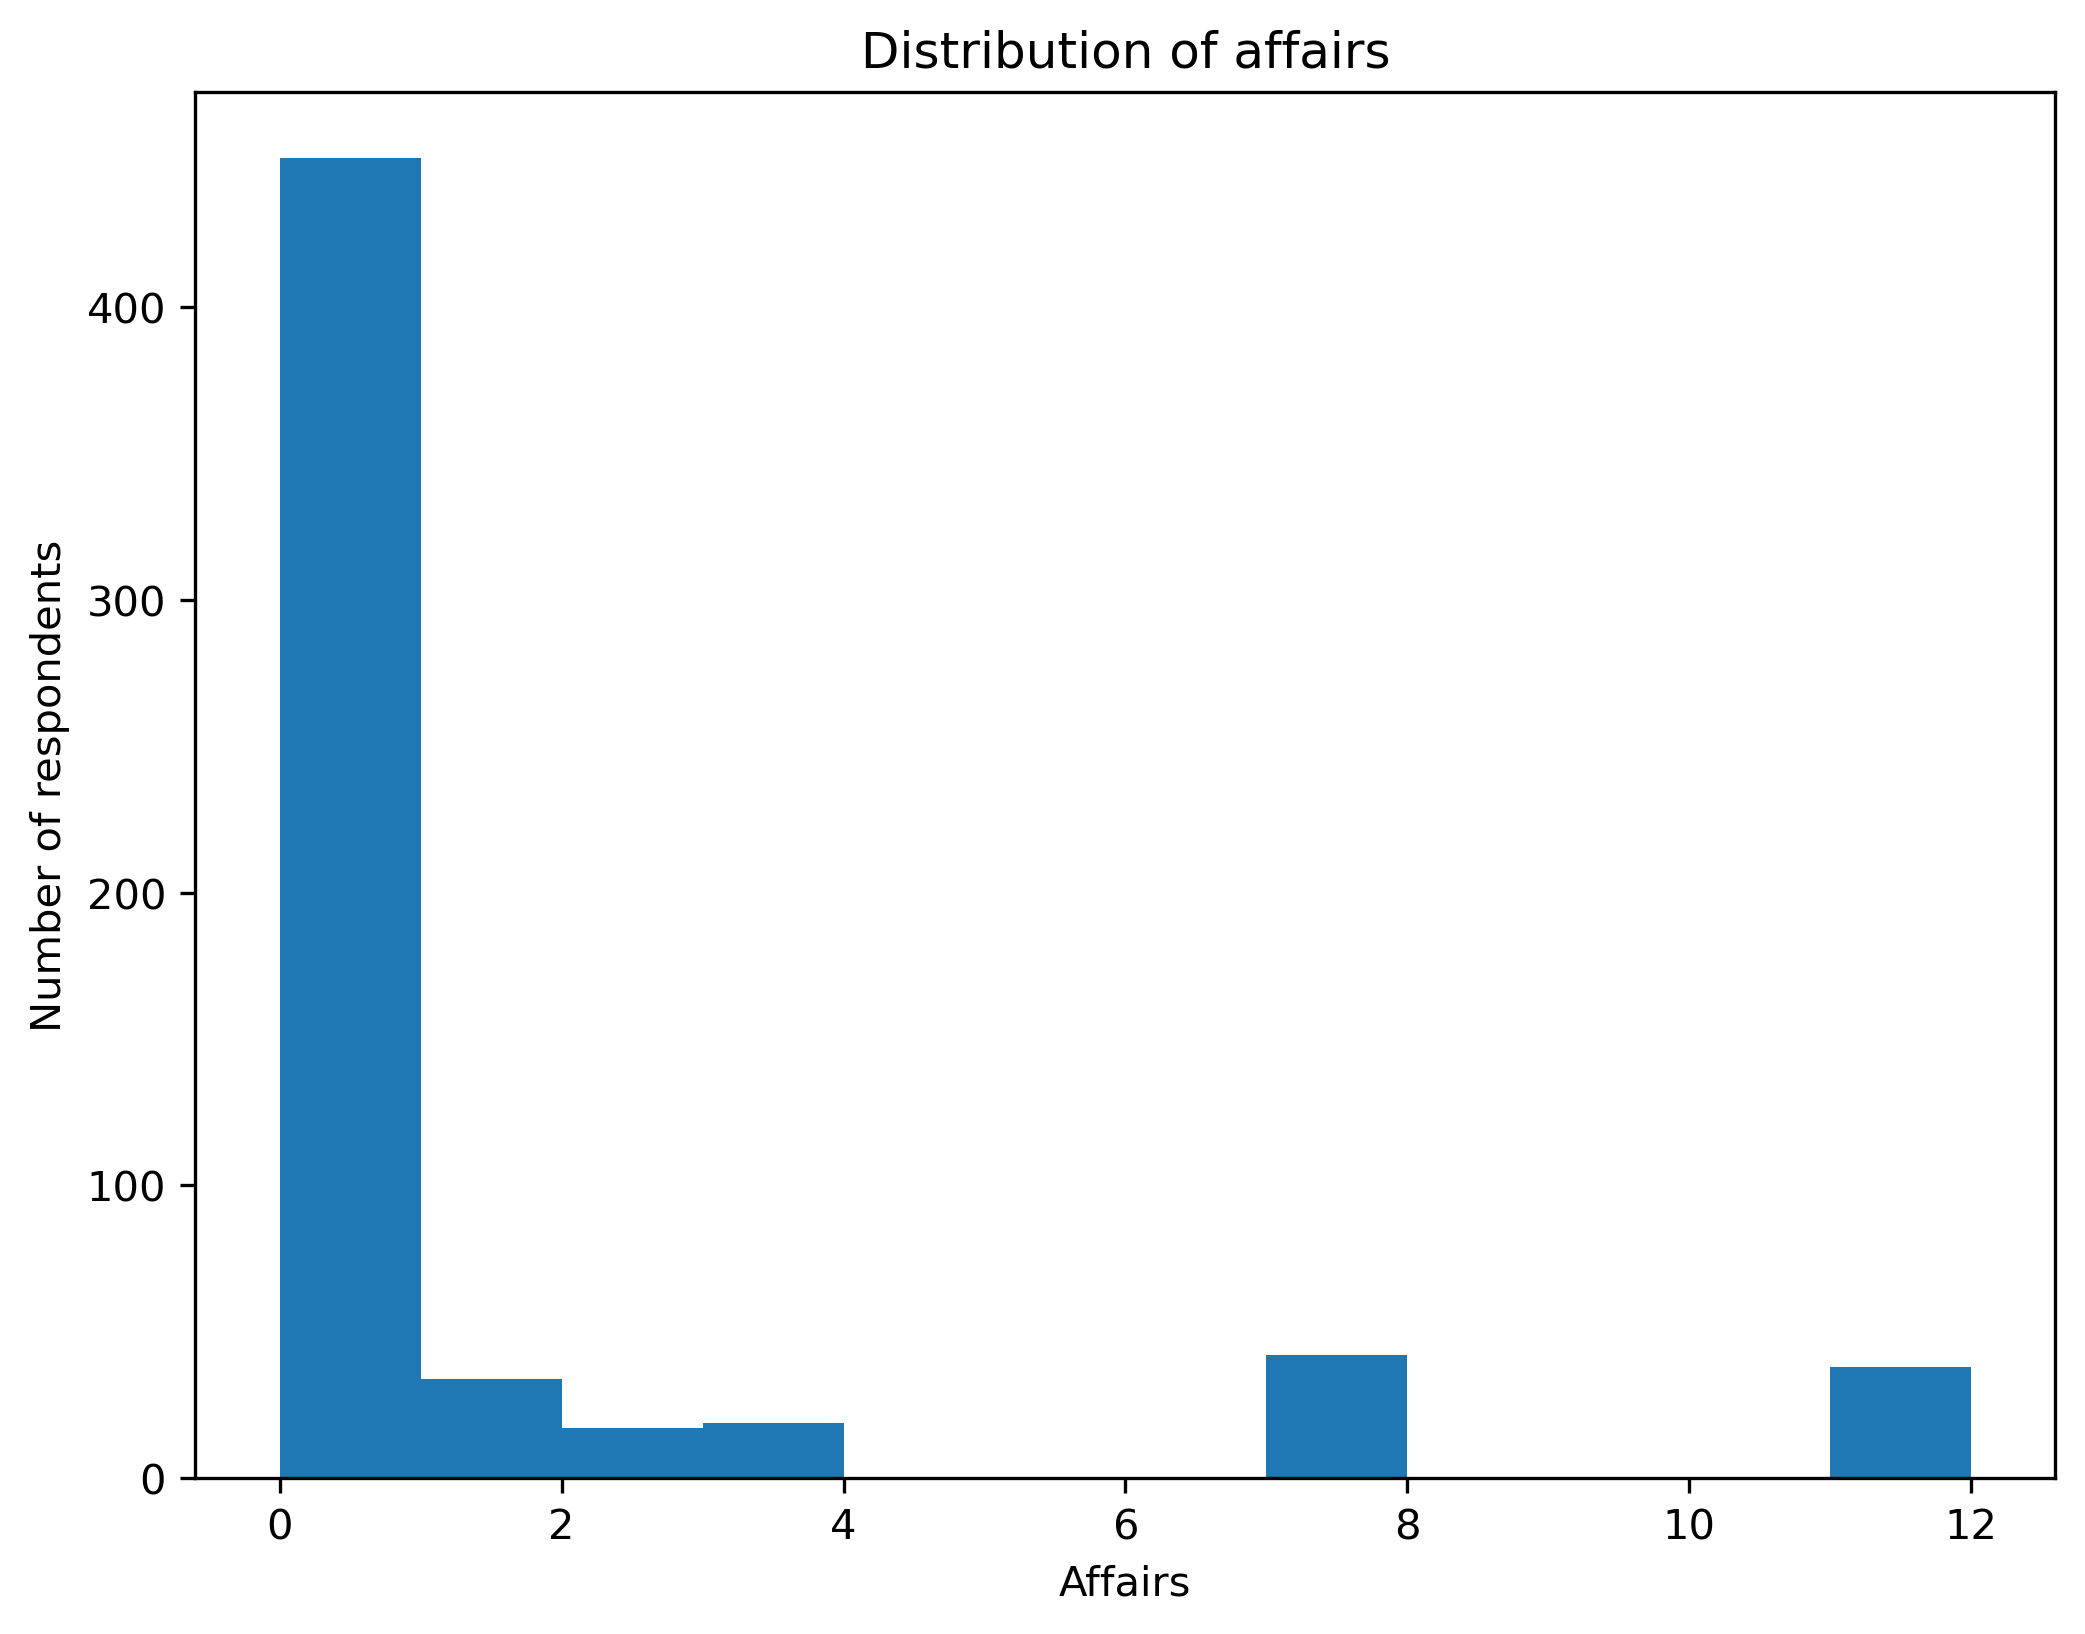

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribution of affairs')
ax.set_xlabel('Affairs')
ax.set_ylabel('Number of respondents')
plt.hist(df['affairs'], bins=12)
plt.show()

In [48]:
df['affairs'].value_counts() 

affairs
0     451
7      42
12     38
1      34
3      19
2      17
Name: count, dtype: int64

Видим, что целевая переменная распределена ассиметрично.

Посмотрим, как количество лет в браке **yearsmarried** влияет на целевую переменную **affairs**.

Среднее количество лет в браке среди респондентов, которые ответили, что у них не было романов (affairs) в течение брака

In [49]:
no_affairs = df.loc[(df['affairs'] == 0)]
no_affairs['yearsmarried'].mean()

7.727279379157428

Среднее количество лет в браке среди респондентов, которые ответили, что у них был хотя бы один роман в течение брака

In [50]:
affairs = df.loc[(df['affairs'] > 0)]
affairs['yearsmarried'].mean()

9.531946666666666

Видим, что для респондентов, у которых был хотя бы один роман, среднее число лет в браке больше, чем у тех, у кого вообще не было романов.

Посмотрим на распределение людей по полу **gender**

In [51]:
df['gender'].value_counts()

gender
female    315
male      286
Name: count, dtype: int64

В опросе участвовало примерно одинаковое количество женщин и мужчин. Найдем среднее число **affairs** для женщин и мужчин.

In [52]:
female_affairs = df.loc[(df['gender'] == 'female')]
female_mean = female_affairs['affairs'].mean()
print(f'Female: {female_mean:.4f}')

Female: 1.4190


In [53]:
male_affairs = df.loc[(df['gender'] == 'male')]
male_mean = male_affairs['affairs'].mean()
print(f'Male: {male_mean:.4f}')

Male: 1.4965


Среднее число романов для мужчин и женщин почти одинково, поэтому можно сделать вывод, что **gender** слабо влияет на **affairs**.

Построим распределение **affairs** в зависимости от того, как ответили респонденты на вопрос о наличии у них детей (**children**).

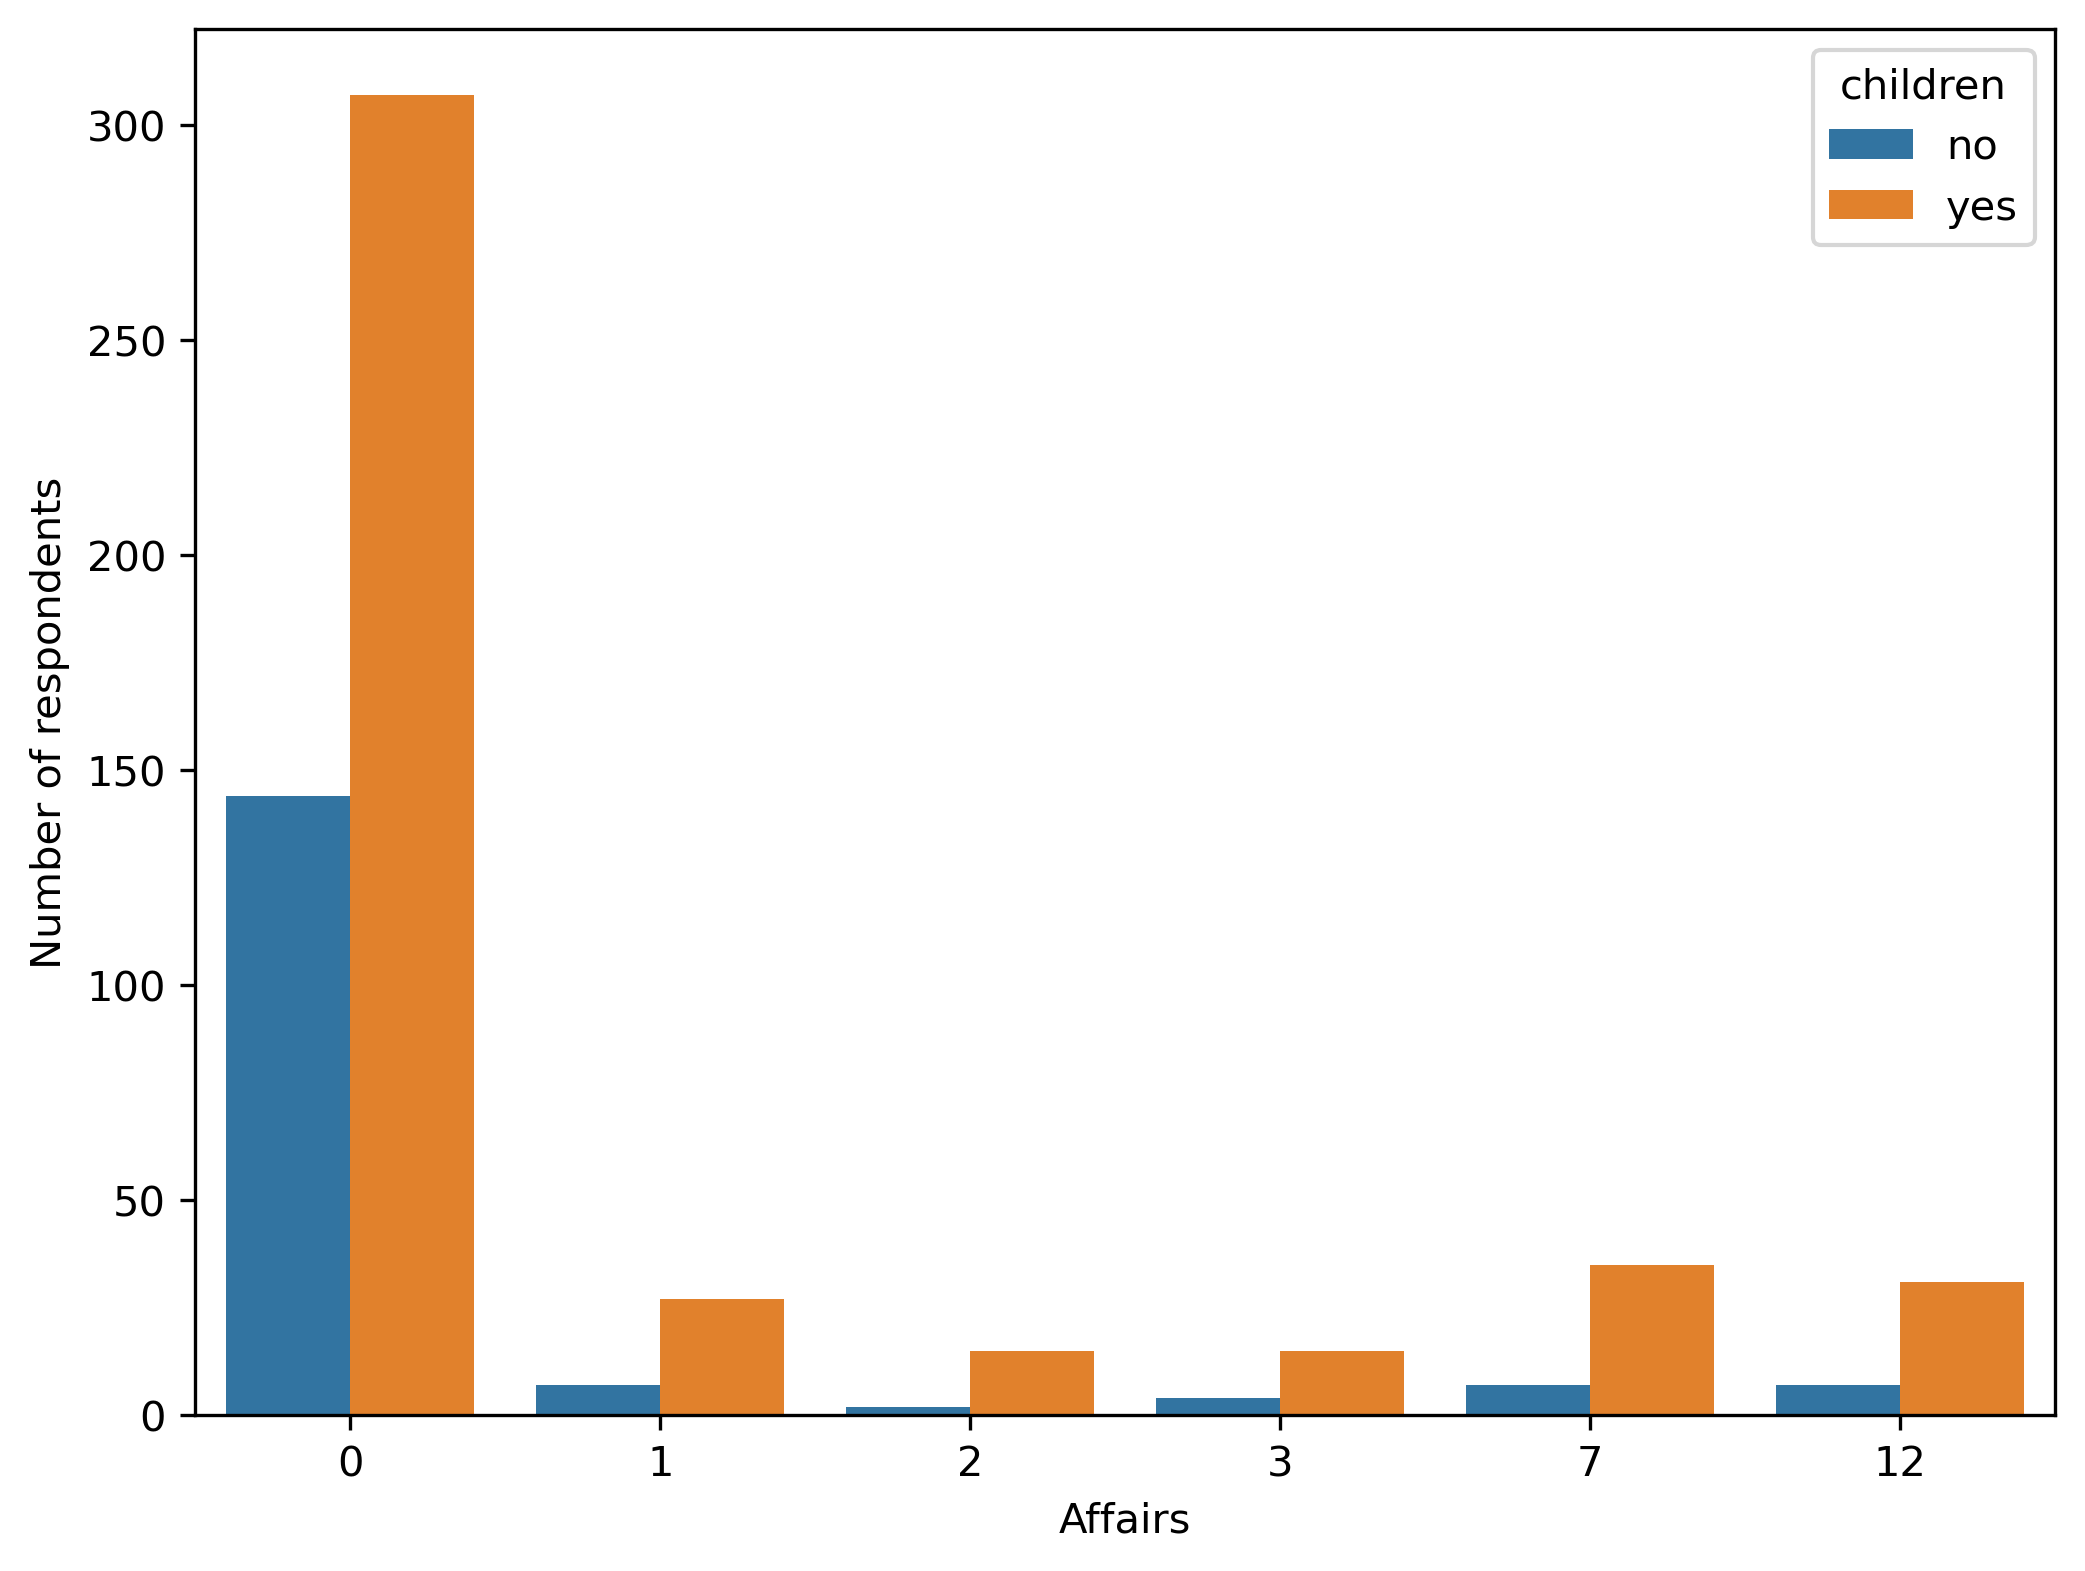

In [54]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300) 
sns.countplot(data=df, x='affairs', hue='children')
ax.set_xlabel('Distribution of affairs depending on the presence of children')
ax.set_xlabel('Affairs')
ax.set_ylabel('Number of respondents')
plt.show()

Посмотрим на количество респондентов, которые ответили, что не имеют детей, и которые ответили, что имеют хотя бы одного ребенка

In [55]:
df['children'].value_counts()

children
yes    430
no     171
Name: count, dtype: int64

Видно, что число респондентов, у которых есть хотя бы один ребенок, намного меньше, чем число респондентов без детей. Для более корректного представления предыдущего распределения необходимо осуществить нормализацию данных. Для этого построим <code>seaborn.<font color=steelblue><font color=steelblue>histplot</font></code>.

In [56]:
# Попробовать отсортировать
df['affairs_str'] = {k: str(v) for k, v in sorted(df['affairs'].items(), key=lambda item: item[1], 
                                              reverse=True)}

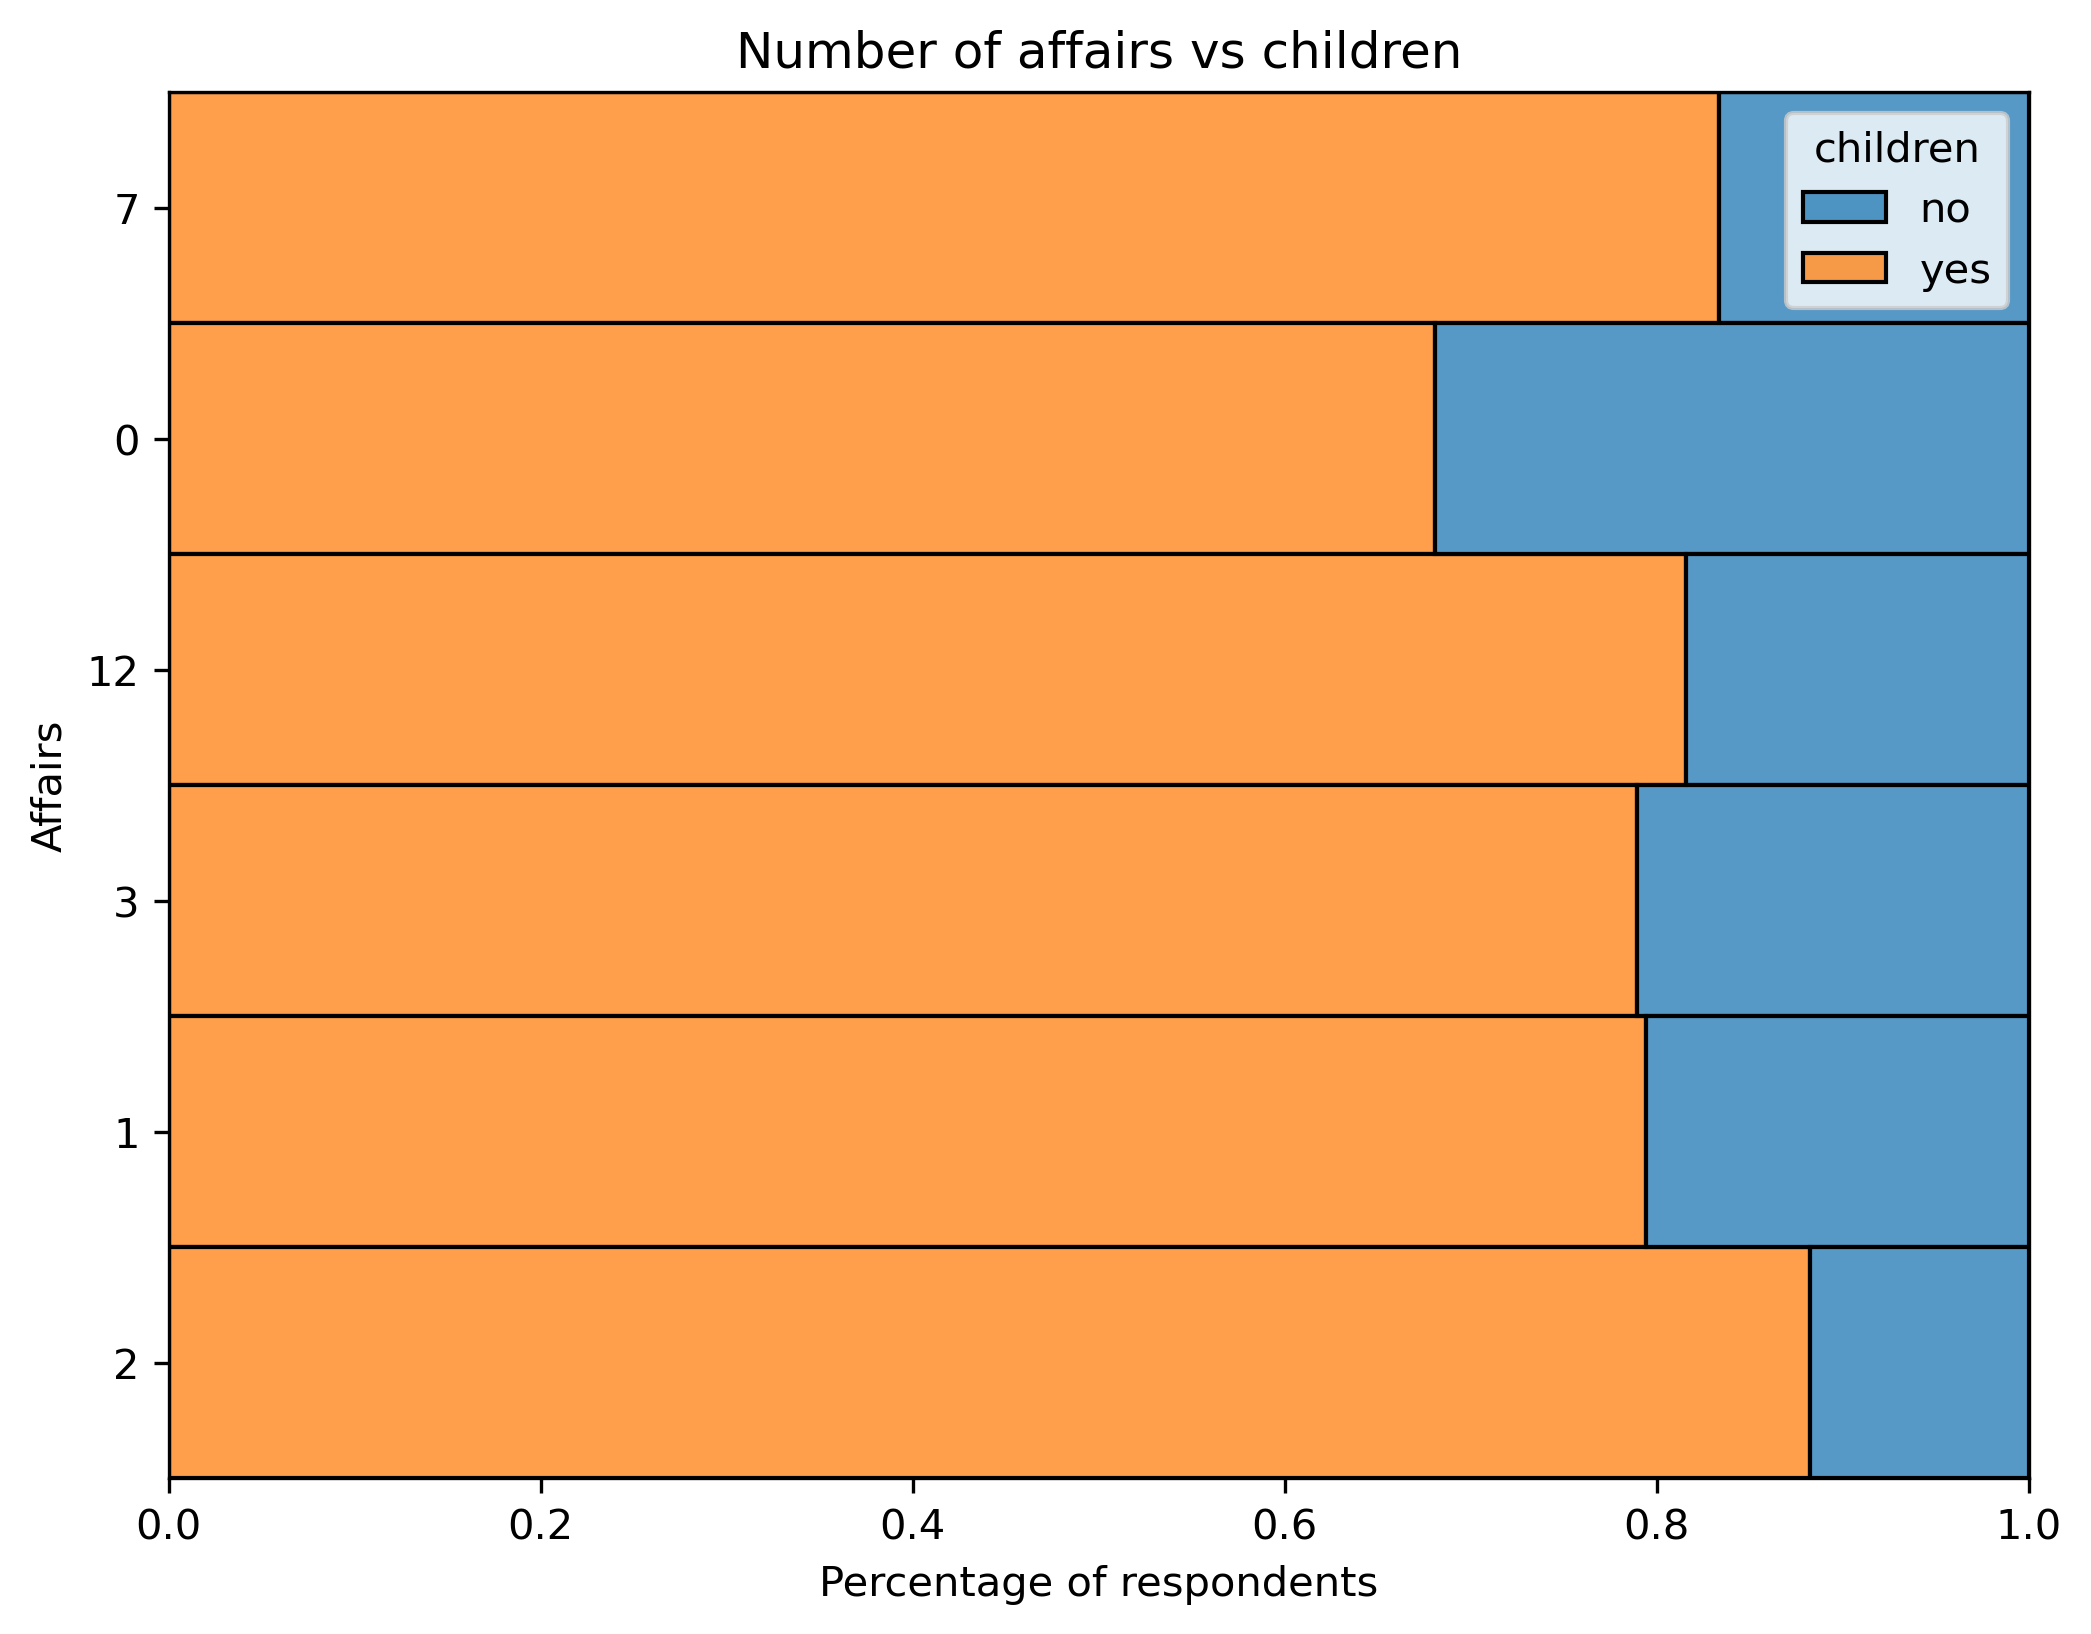

In [57]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
ax.set_title('Number of affairs vs children')
ax.set_xlabel('Percentage of respondents')
ax.set_ylabel('Affairs')
sns.histplot(data=df, y='affairs_str', hue='children',
             multiple='fill')
plt.show()

In [58]:
no_children_affairs = df.loc[(df['children'] == 'no')]
no_children_mean = no_children_affairs['affairs'].mean()

yes_children_affairs = df.loc[(df['children'] == 'yes')]
yes_children_mean = yes_children_affairs['affairs'].mean()

total_mean = df['affairs'].mean()

print(f'No children: {no_children_mean:.4f}')
print(f'Yes children: {yes_children_mean:.4f}')
print(f'Total: {total_mean:.4f}')

No children: 0.9123
Yes children: 1.6721
Total: 1.4559


Видим, что среднее число романов у тех, кто имеет хотя бы одного ребенка, больше, чем у тех, у кого нет ни одного ребенка. 

Посмотрим на распределение респондентов по возрасту (**age**)

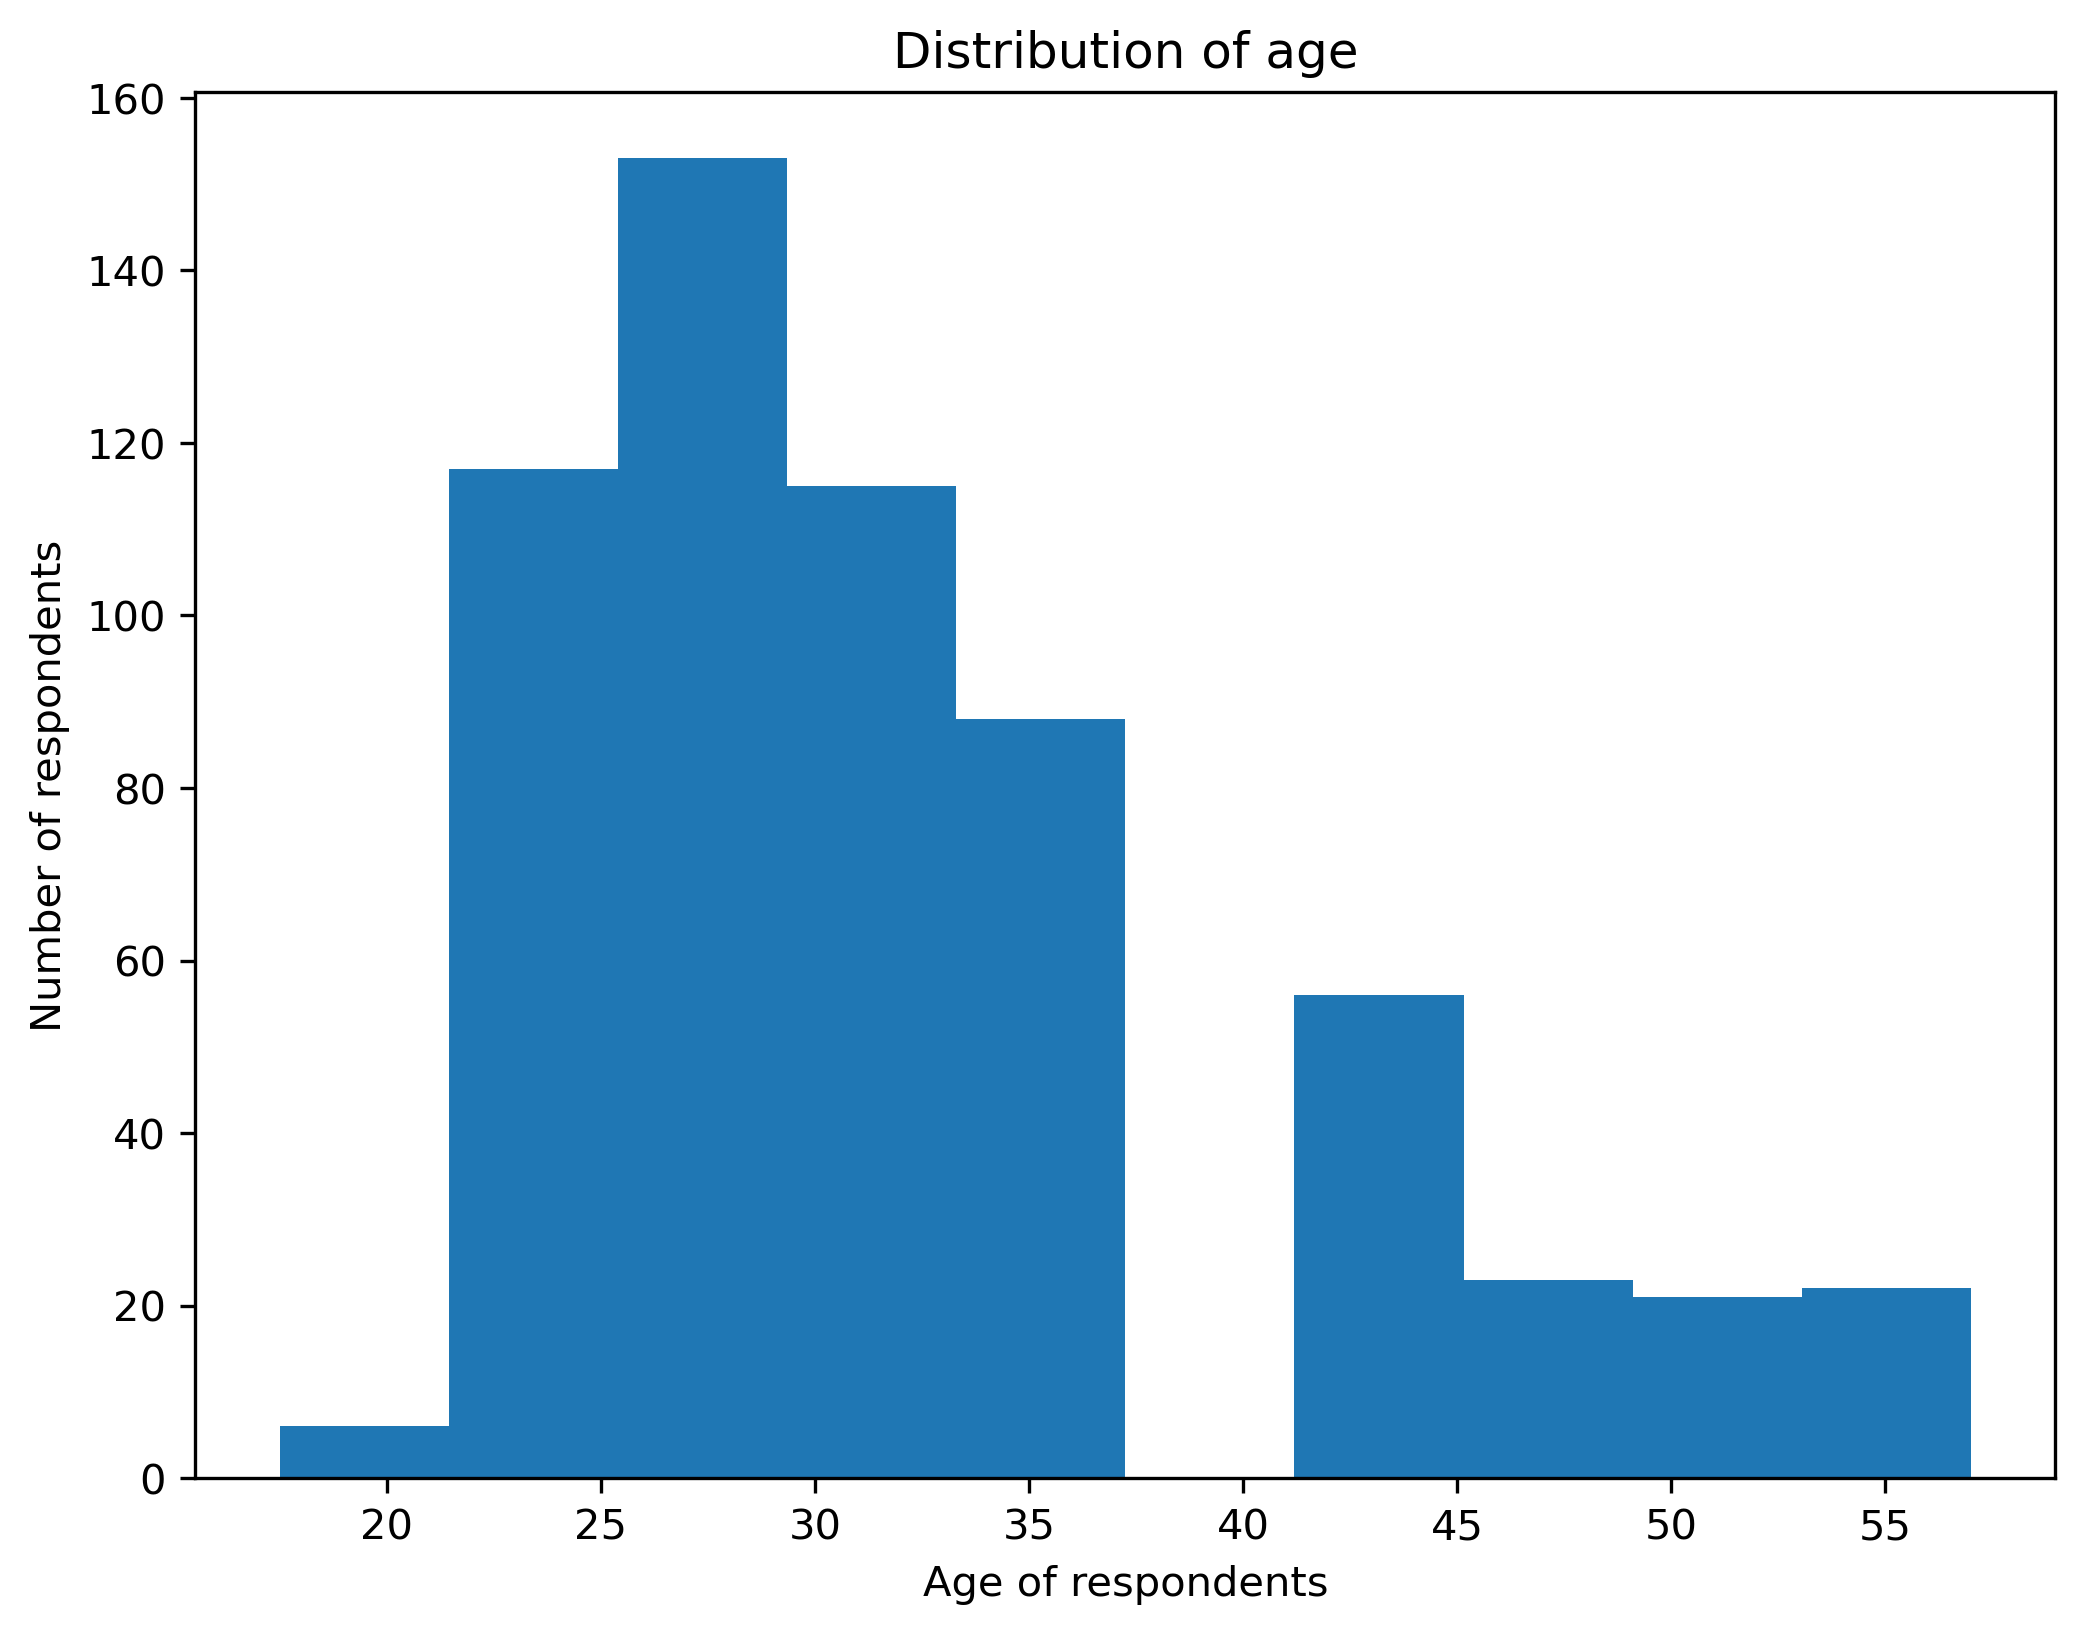

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribution of age')
ax.set_xlabel('Age of respondents')
ax.set_ylabel('Number of respondents')
plt.hist(df['age'], bins=10)
plt.show()

In [60]:
df['age'].describe()

count    601.000000
mean      32.487521
std        9.288762
min       17.500000
25%       27.000000
50%       32.000000
75%       37.000000
max       57.000000
Name: age, dtype: float64

В датасете представлены респонденты от 17 до 57 лет. Средний возраст респондентов от 30 до 35 лет.

Посмотрим на распределение возраста для тех респондентов, у которых был хотя бы один роман, в зависимости от наличия детей

<Figure size 2400x2400 with 0 Axes>

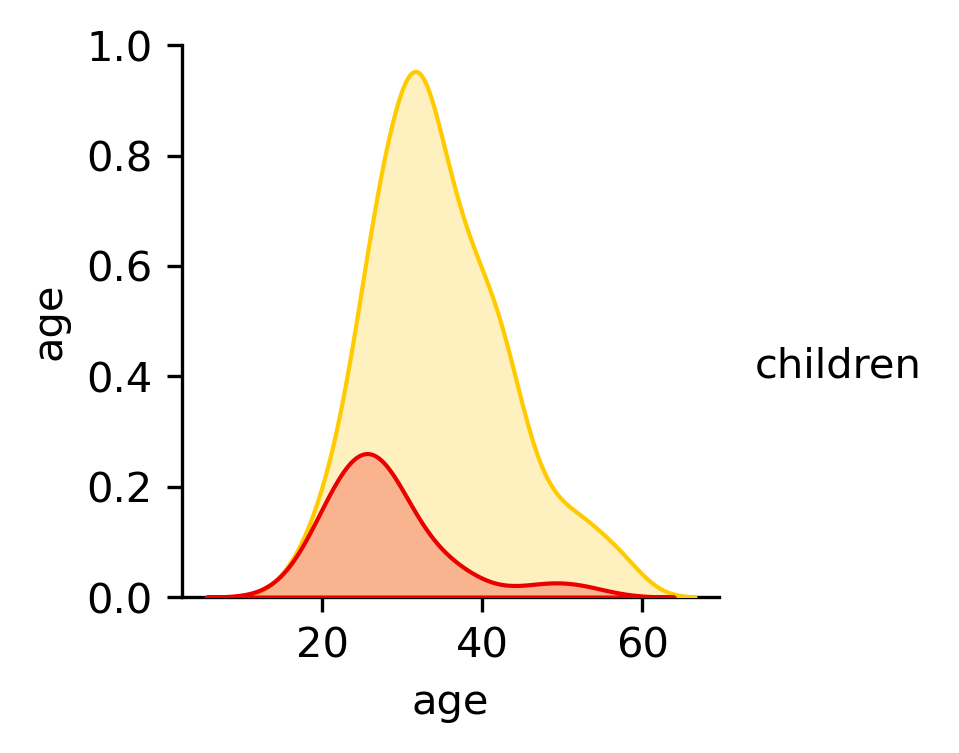

In [61]:
fig = plt.figure(figsize=(8, 8))
#plt.tight_layout()
sns.pairplot(data=df.loc[(df['affairs'] > 0)], hue='children', plot_kws={'alpha' : 0.2}, palette='hot',
             x_vars=['age'], y_vars=['age'])
plt.show()

Похоже, что люди, у которых был хотя бы один роман и хотя бы один ребенок, как правило, были старше тех, у кого был хотя бы один роман, но детей не было.

Теперь перейдем к признаку **education** (количество лет, которые респондент потратил на получения образования)

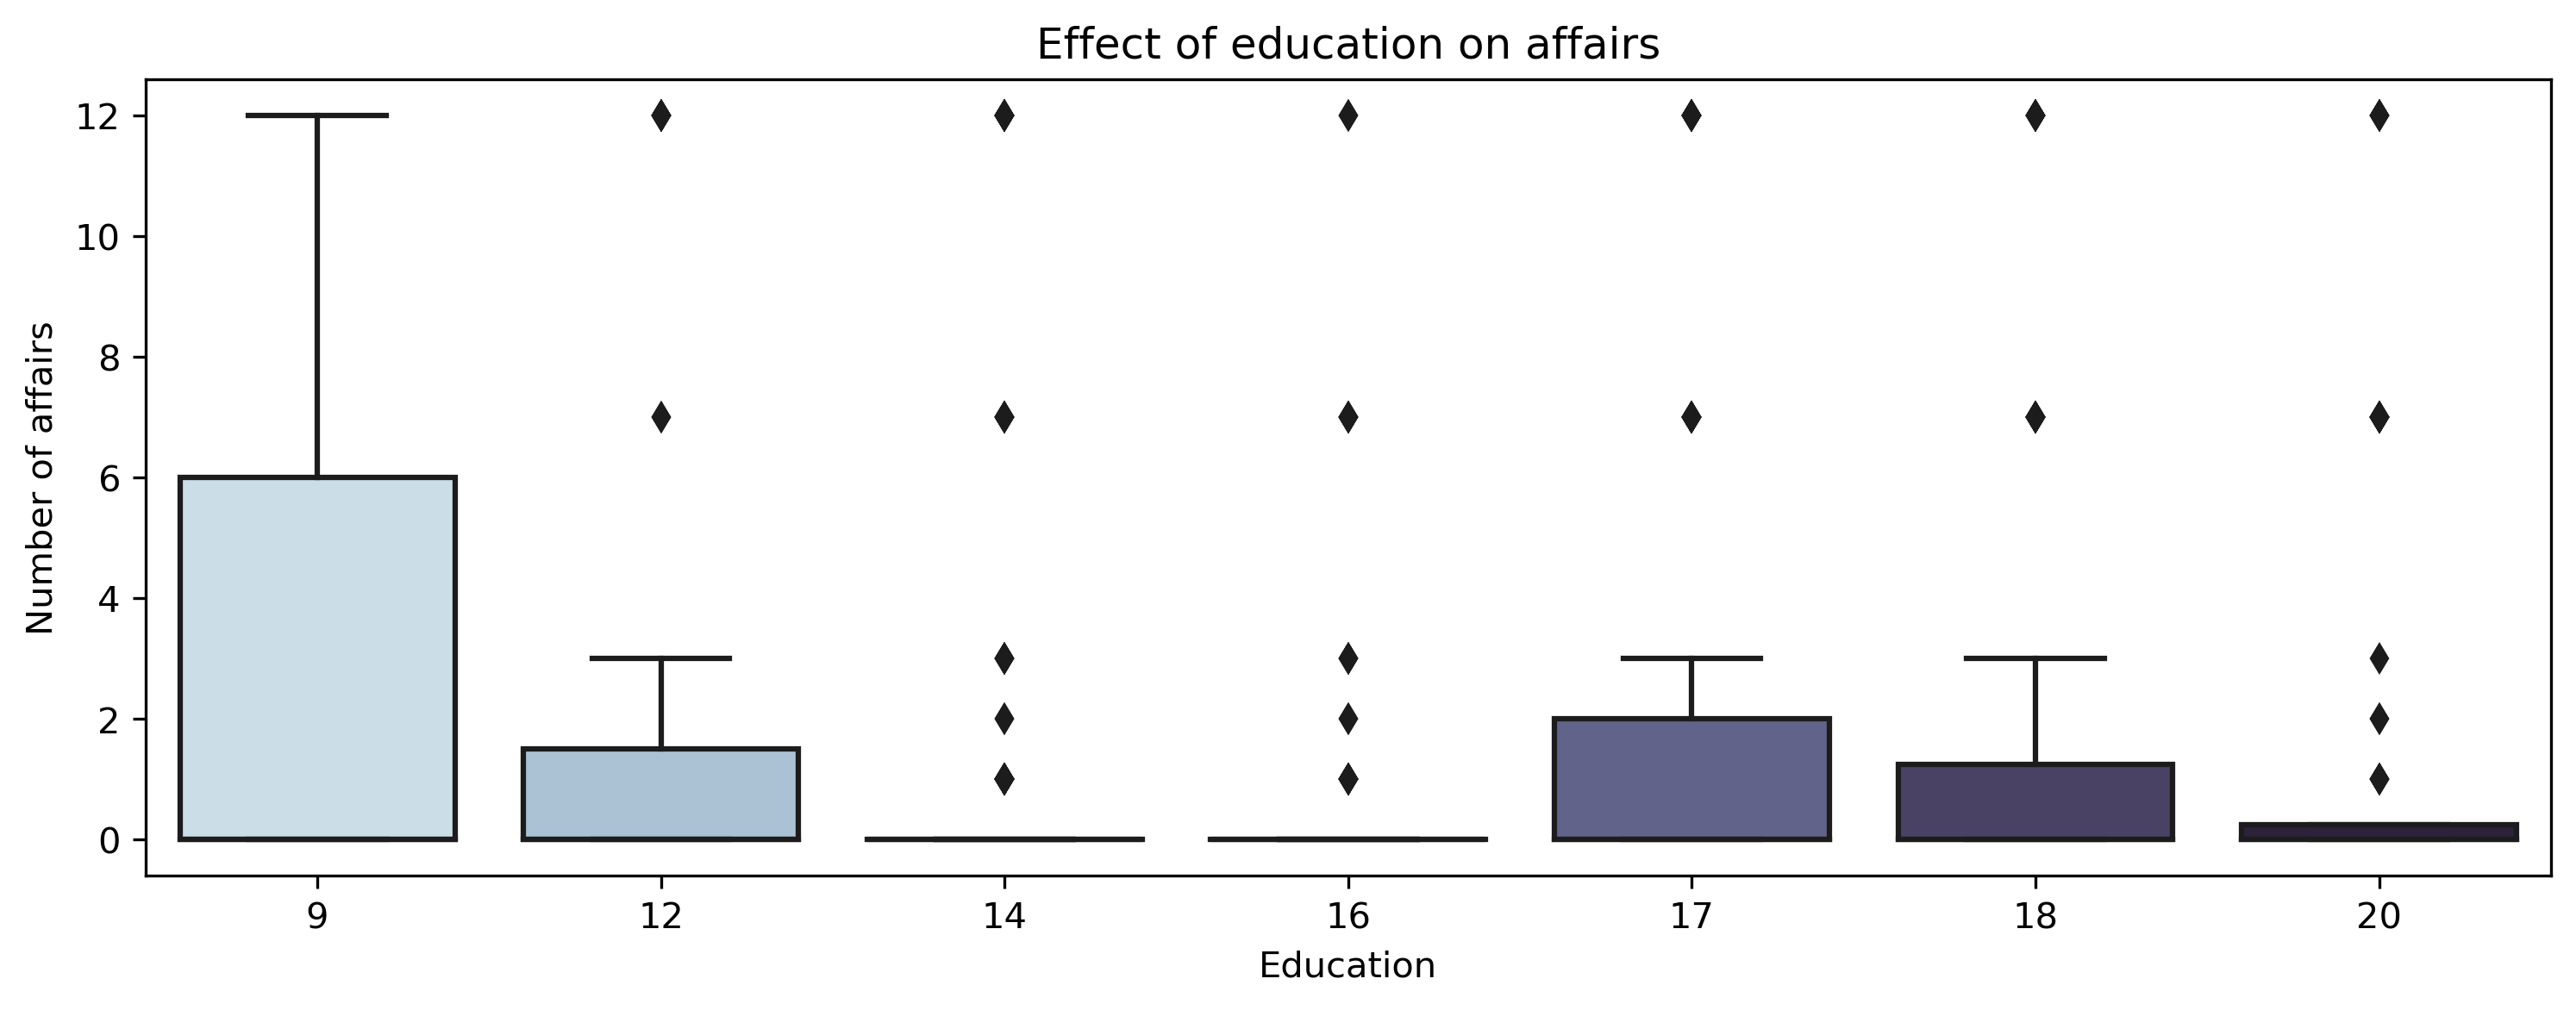

In [62]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=df, x='education', y='affairs', palette='ch:s=.25,rot=-.25')
plt.title('Effect of education on affairs')
ax.set_xlabel('Education')
ax.set_ylabel('Number of affairs')
plt.show()

Видно, что довольно большое количество романов у тех, кто учился только 9 лет.

Рассмотрим признак **religiousness** (уровень религиозности)

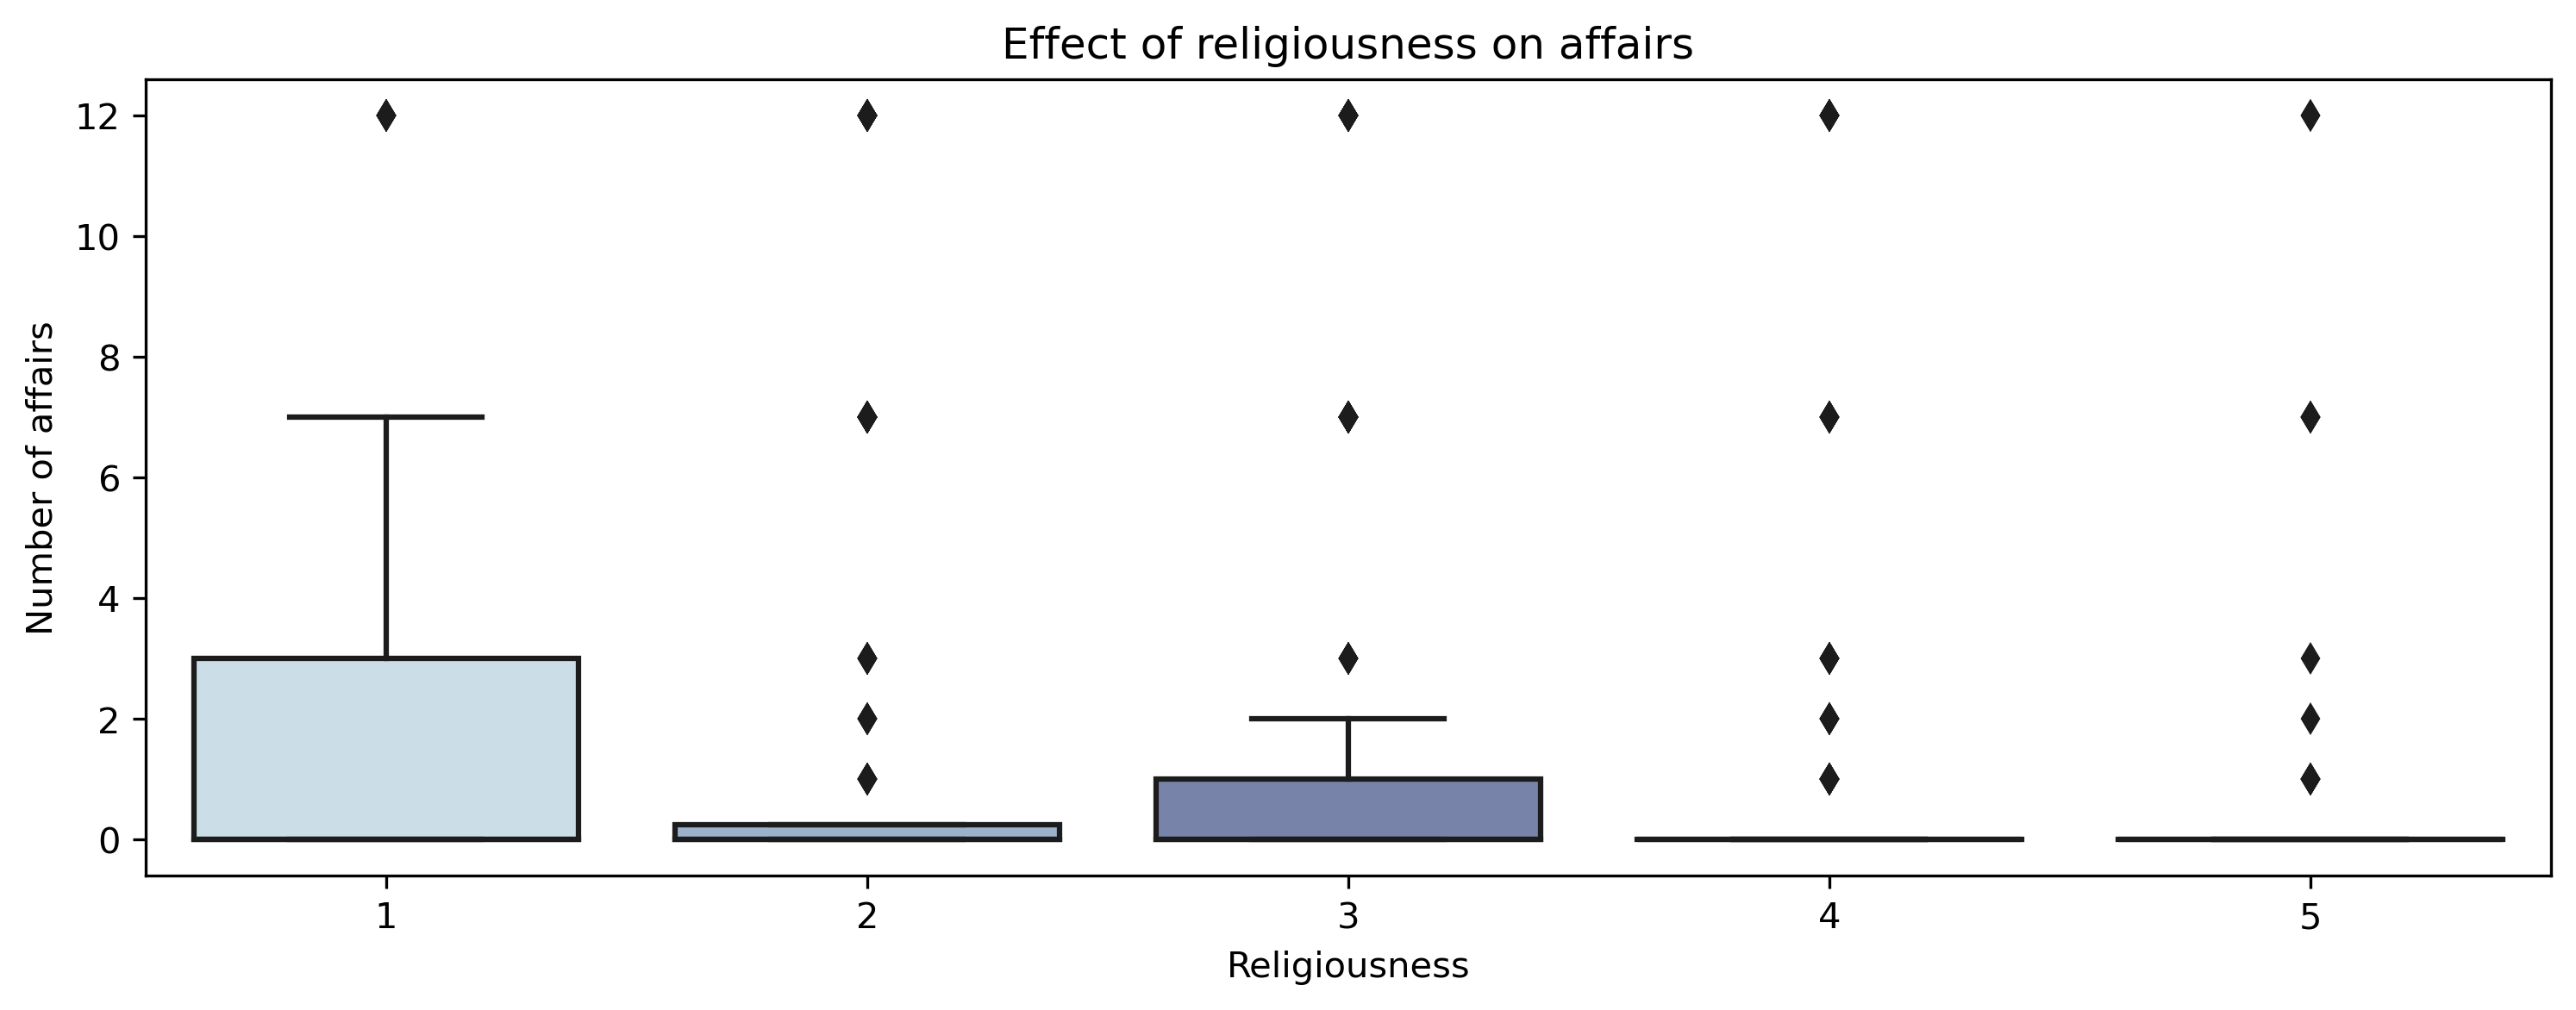

In [63]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=df, x='religiousness', y='affairs', palette='ch:s=.25,rot=-.25')
plt.title('Effect of religiousness on affairs')
ax.set_xlabel('Religiousness')
ax.set_ylabel('Number of affairs')
plt.show()

Более религиозные люди меньше склонны к романам на стороне.

Наконец, посмотрим на признак **rating**

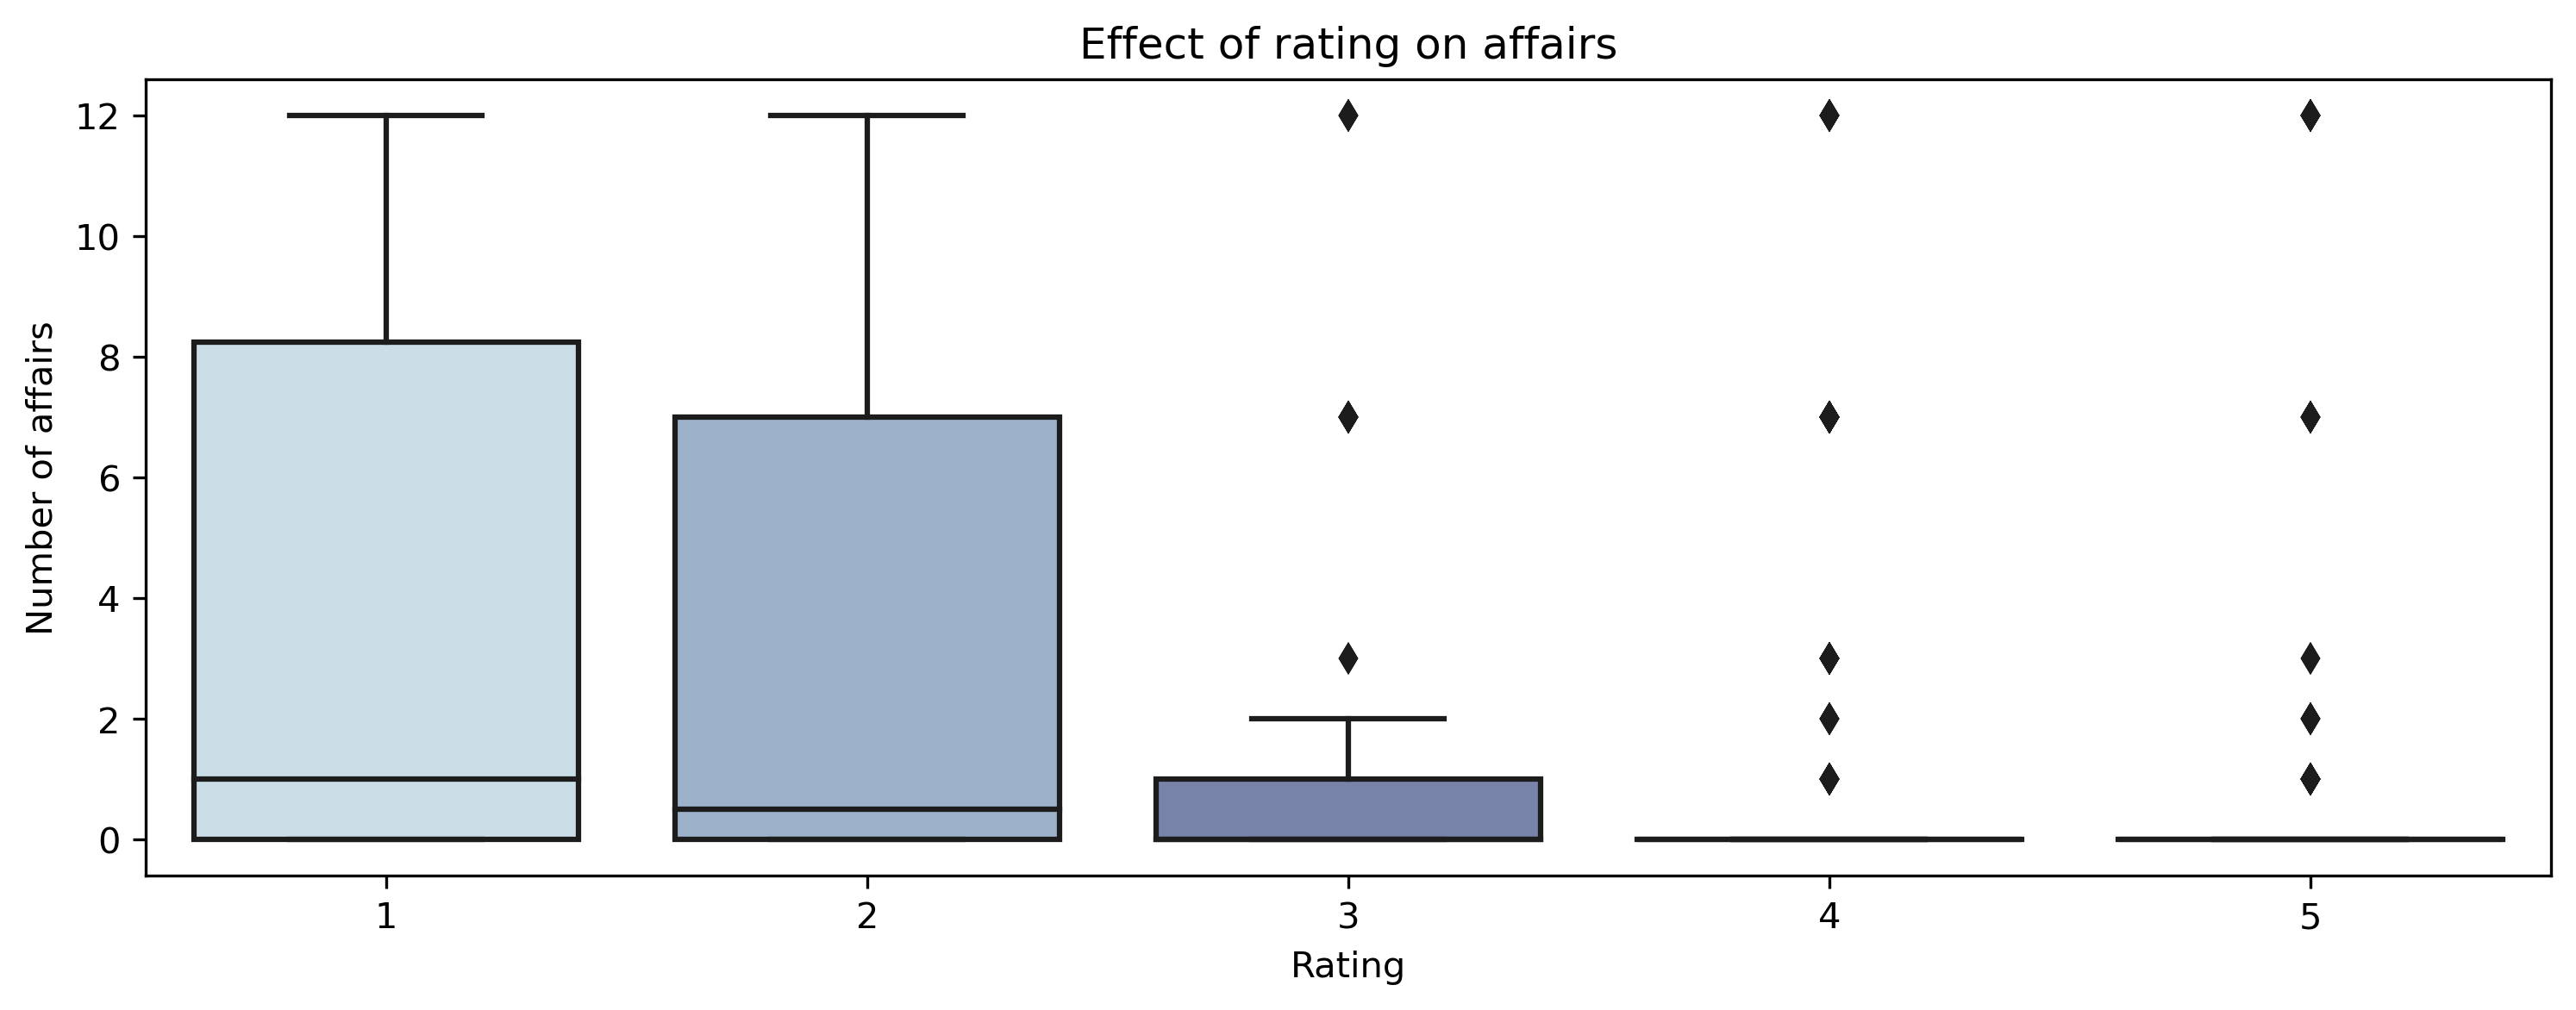

In [64]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=df, x='rating', y='affairs', palette='ch:s=.25,rot=-.25')
plt.title('Effect of rating on affairs')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of affairs')
plt.show()

Видно, что чем лучше восприятие людьми их положения в браке, тем они менее склонны к романам.

Теперь перейдем к задаче машинного обучения.

Признаки **gender** и **children** являются категориальными. Закодируем их, используя map

In [65]:
df['gender'].value_counts()  

gender
female    315
male      286
Name: count, dtype: int64

In [66]:
# female - 0
# male - 1
df['gender'] = df['gender'].map({'female' : 0, 'male' : 1})

In [67]:
df['children'].value_counts() 

children
yes    430
no     171
Name: count, dtype: int64

In [68]:
# no - 0
# yes - 1
df['children'] = df['children'].map({'no' : 0, 'yes' : 1})

In [69]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affairs_str
486,7,0,37.0,10.0,0,1,20,5,3,7
248,0,0,52.0,15.0,1,3,16,5,4,0
138,0,1,27.0,4.0,1,4,20,5,5,0
432,0,1,27.0,4.0,1,4,17,4,4,0
437,0,0,42.0,15.0,1,4,14,5,4,0


Удалим столбец **affairs_str**

In [70]:
df = df.drop(columns=['affairs_str'])
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
486,7,0,37.0,10.0,0,1,20,5,3
248,0,0,52.0,15.0,1,3,16,5,4
138,0,1,27.0,4.0,1,4,20,5,5
432,0,1,27.0,4.0,1,4,17,4,4
437,0,0,42.0,15.0,1,4,14,5,4


Сформируем матрицу признаков и вектор из значений целевой переменной

In [71]:
cols = df.columns.tolist()
cols.remove('affairs')
X_full = df[cols]
y_full = df['affairs']

In [72]:
X_full.shape

(601, 8)

Разобьем датасет на обучающую и тестовую выборки

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,
    test_size=0.2, random_state=42)

Осуществим масштабирование данных

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию на обучающей выборке. Предскажем значение целевой переменной **affairs** на тестовой выборке. Оценим качество модели, найдя коэффициент детерминации

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

prediction_train = lr.predict(X_train)
prediction_test = lr.predict(X_test)

print(f'R^2 on train: {r2_score(y_train, prediction_train):.6f}')
print(f'R^2 on test: {r2_score(y_test, prediction_test):.6f}')

R^2 on train: 0.107254
R^2 on test: 0.215058


Модель линейной регрессии плохо предсказывает результаты на обучающей и тестовой выборках. Попробуем провести **feature engineering**, отобрав признаки по их значимости.

Построим корреляционную матрицу признаков

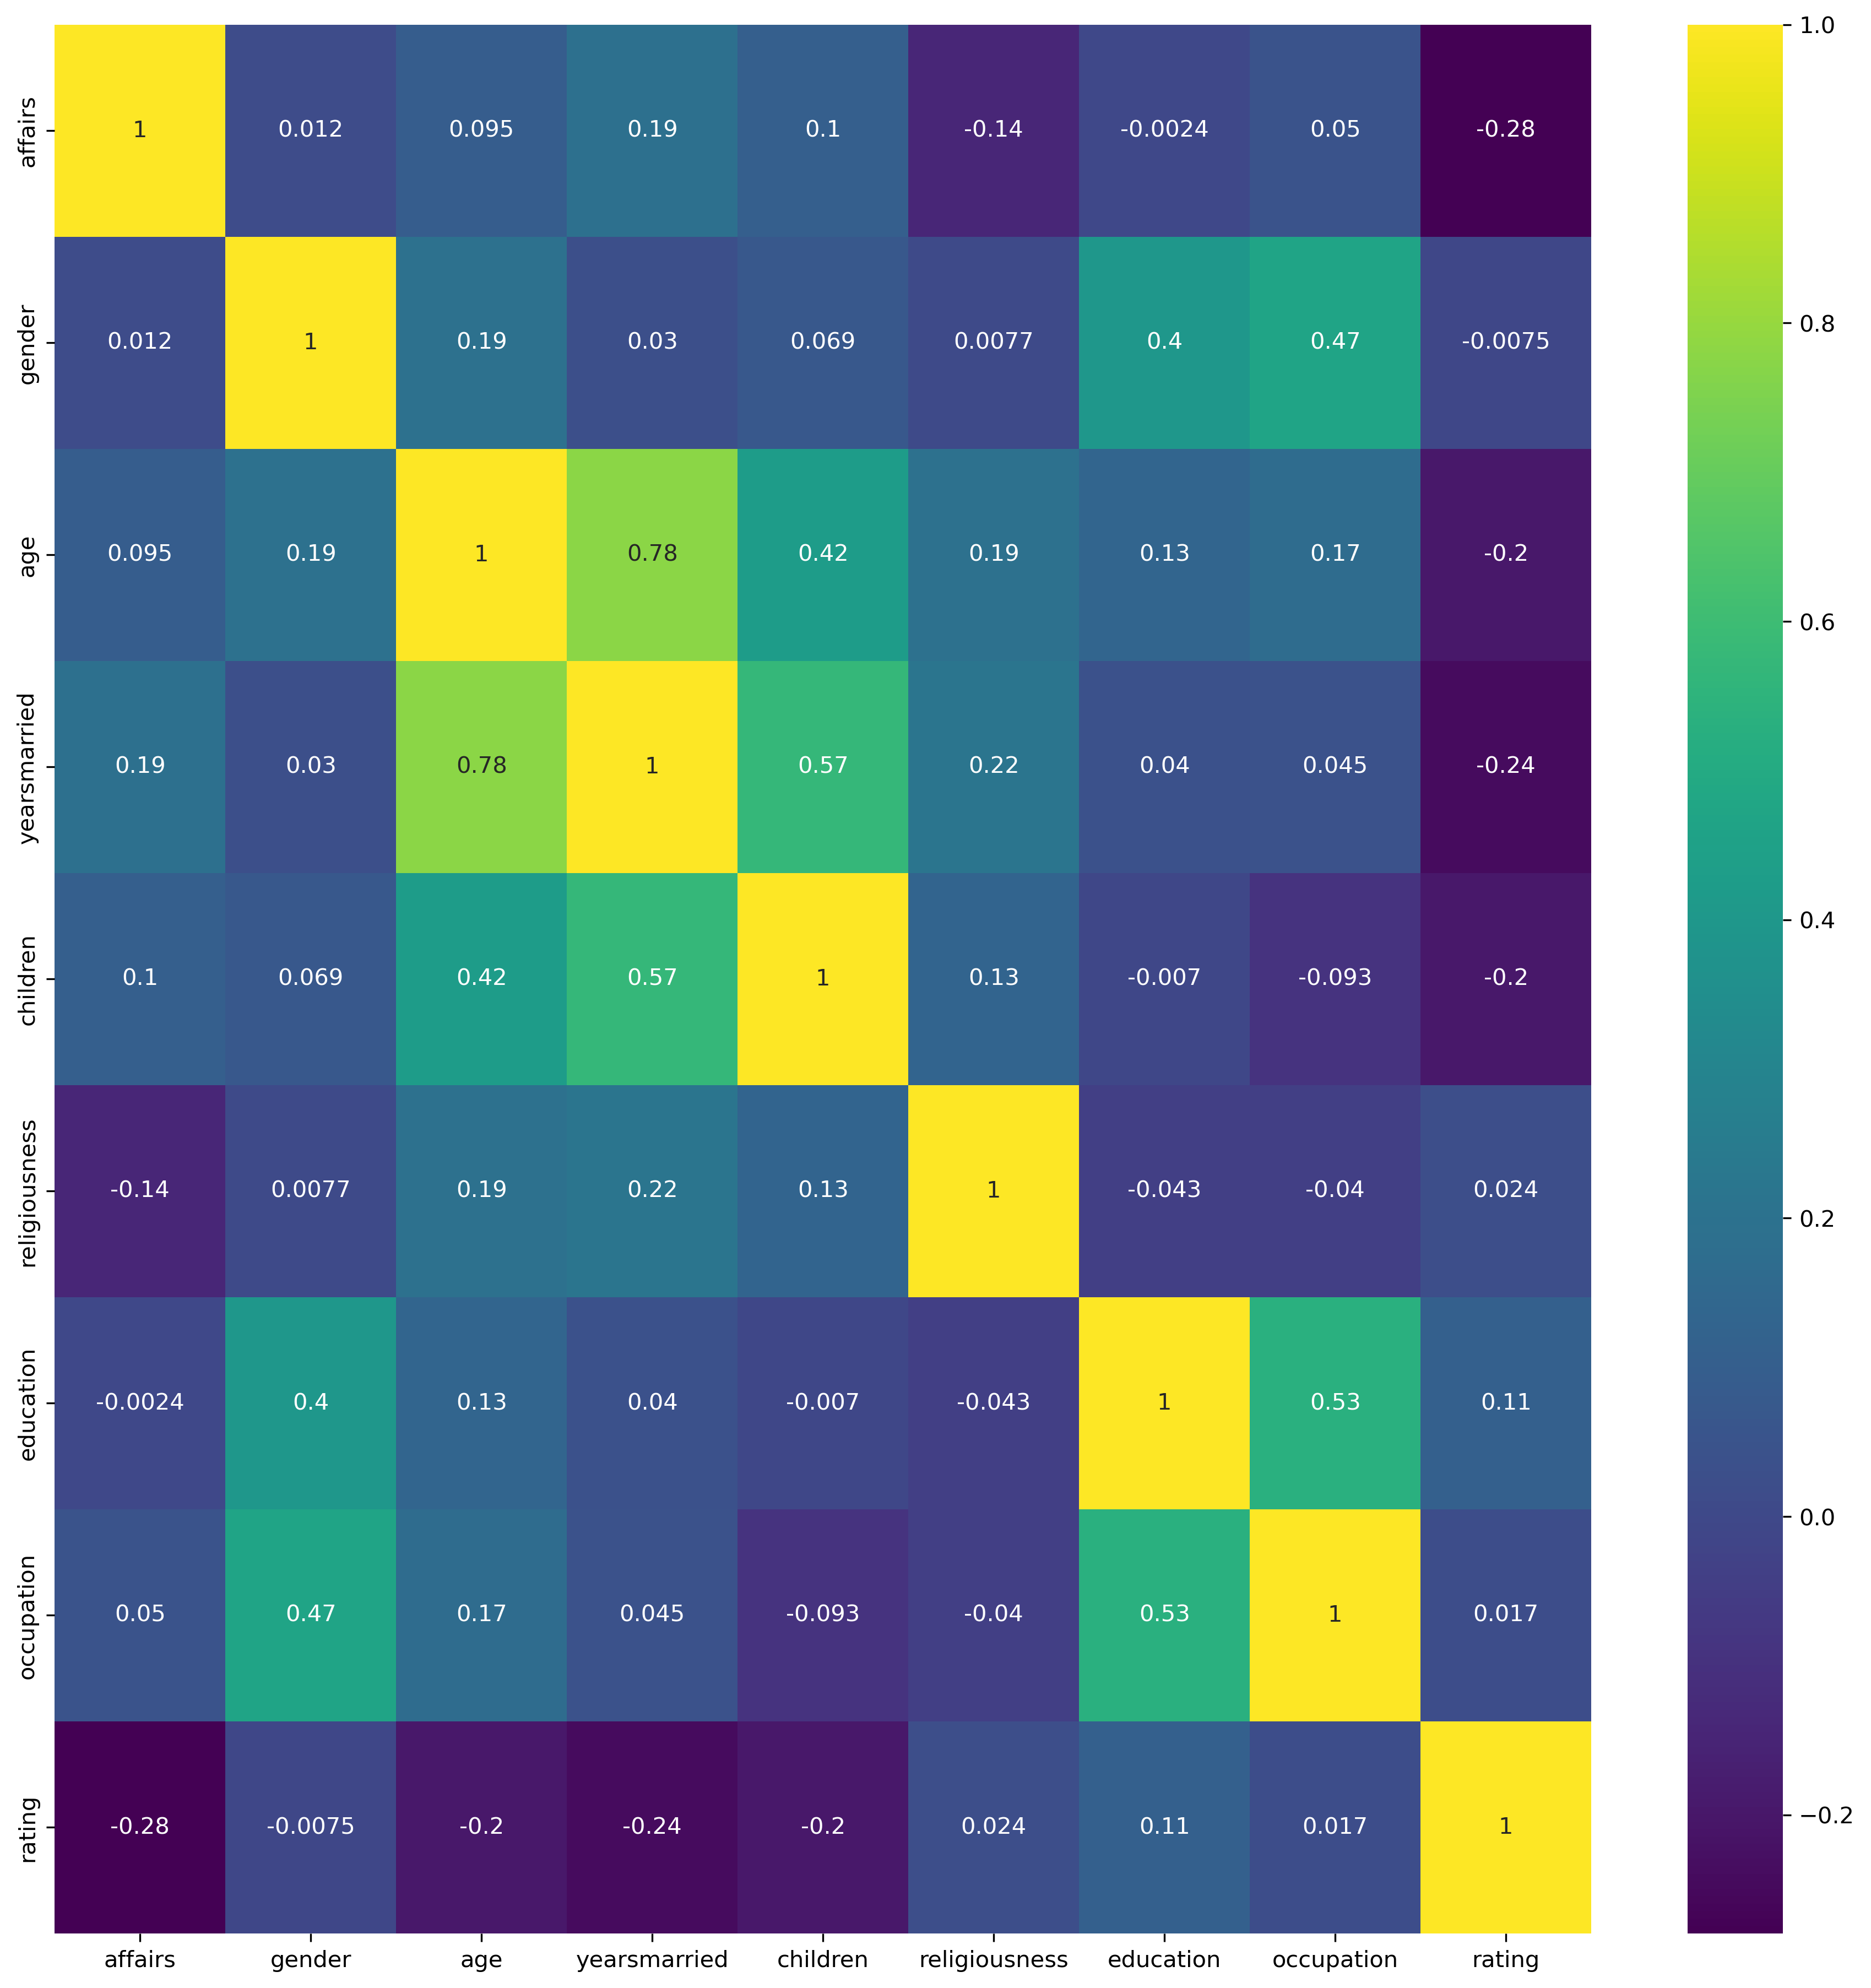

In [76]:
corr = df.corr()
                    
figure = plt.figure(figsize=(15, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='viridis', annot=True)
plt.show()

Выведем признаки, отсортировав их по абсолютному значению корреляции с целевой переменной

In [77]:
affairs_corr = corr['affairs'].to_dict()
affairs_corr.pop('affairs')
affairs_corr_sorted = {k: v for k, v in sorted(affairs_corr.items(), key=lambda item: abs(item[1]), 
                                              reverse=True)}
for key in affairs_corr_sorted:
    print(f'{key:>15} {affairs_corr_sorted[key]:>10.5f}')

         rating   -0.27951
   yearsmarried    0.18684
  religiousness   -0.14450
       children    0.10401
            age    0.09524
     occupation    0.04961
         gender    0.01174
      education   -0.00244


Сделаем определенные выводы по корреляционному анализу:

1. Сильнее всего коррелирует признак **rating**.

2. Между признаками **age** и **yearsmarried** имеется сильная корреляция. Поэтому следует оставить только один из признаков, который сильнее всего коррелирует с целевой переменной $-$ **yearsmarried**.

3. С признаком **yearsmarried** также коррелирует признак **children**, поэтому последний тоже можно убрать из рассмотрения.

4. Признаки **occupation**, **gender** и **education** можно удалить из матрицы признаков (они сильно коррелируют между собой и слабо влияют на целевую переменную **affairs**). 

In [78]:
cols = df.columns.tolist()
cols.remove('affairs')
cols.remove('children')
cols.remove('age')
cols.remove('occupation')
cols.remove('gender')
cols.remove('education')
X_full = df[cols]
y_full = df['affairs']

In [79]:
X_full.shape

(601, 3)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,
    test_size=0.2, random_state=42)

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)

prediction_train = lr.predict(X_train)
prediction_test = lr.predict(X_test)

print(f'R^2 on train: {r2_score(y_train, prediction_train):.6f}')
print(f'R^2 on test: {r2_score(y_test, prediction_test):.6f}')

R^2 on train: 0.100836
R^2 on test: 0.198534


Качество модели почти не изменилось. Попробуем учесть мультипликативный эффект от признаков **rating** и **yearsmarried**. Создадим новую колонку в датасете.

In [83]:
df['mult_term'] = df['yearsmarried'] * df['rating']

In [84]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,mult_term
486,7,0,37.0,10.0,0,1,20,5,3,30.0
248,0,0,52.0,15.0,1,3,16,5,4,60.0
138,0,1,27.0,4.0,1,4,20,5,5,20.0
432,0,1,27.0,4.0,1,4,17,4,4,16.0
437,0,0,42.0,15.0,1,4,14,5,4,60.0


In [85]:
cols = df.columns.tolist()
cols.remove('affairs')
cols.remove('children')
cols.remove('age')
cols.remove('occupation')
cols.remove('gender')
cols.remove('education')
X_full = df[cols]
y_full = df['affairs']

In [86]:
X_full.shape

(601, 4)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,
    test_size=0.2, random_state=42)

In [88]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

prediction_train = lr.predict(X_train)
prediction_test = lr.predict(X_test)

print(f'R^2 on train: {r2_score(y_train, prediction_train):.6f}')
print(f'R^2 on test: {r2_score(y_test, prediction_test):.6f}')

R^2 on train: 0.106656
R^2 on test: 0.211705


Удалось чуть-чуть увеличить качество модели.

Рассмотрим качество модели на кросс-валидации

In [90]:
from sklearn.model_selection import cross_val_score

print(f"Cross-validation R^2 score : {cross_val_score(lr, X_full, y_full, cv=5, scoring='r2').mean()}")

Cross-validation R^2 score : 0.09507275939909043


Сильно улучшить качество модели при отборе признаков не удалось.